In [3]:
# %load /Users/hwayment/ipynb_defaults.py
%load_ext autoreload
%autoreload 2

%pylab inline
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')

# from arnie.mfe import mfe
# from arnie.pfunc import pfunc
# from arnie.bpps import bpps
# from ipynb.draw import draw_struct
# from RiboGraphViz import RGV
# openai  ='open -a "Adobe Illustrator"'

from matplotlib.colors import LogNorm
#from eternabench.plot import corrfunc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [6]:
nr_df = pd.read_json('nullrecurrent_reshaped.json.zip')
nr_df = nr_df.sort_values('sequence')
df = pd.read_json('RYOS_FULL_23Jul2021.json.zip')

nr_df = nr_df.merge(df[['EternaScore','test_filter','errors_reactivity','errors_deg_Mg_50C',
                        'errors_deg_Mg_pH10','sequence','signal_to_noise_reactivity',
                       'signal_to_noise_deg_Mg_pH10', 'signal_to_noise_deg_Mg_50C']], on='sequence',how='left')
nr_df = nr_df.loc[nr_df['test_filter']==1]
df = df.merge(nr_df[['sequence','predicted_loop_type']], on='sequence',sort=True) # reduce to just those in nr_df
nr_df = nr_df.reset_index()


In [43]:
nr_df.to_json('nullrecurrent_cleaned_12Aug2021.json.zip')

In [8]:
df = pd.read_json('RYOS_FULL_23Jul2021.json.zip')
df = df.merge(nr_df[['sequence','predicted_loop_type']], on='sequence',sort=True) # reduce to just those in nr_df

nr_df = pd.read_json('nullrecurrent_cleaned_12Aug2021.json.zip')

In [8]:
nr_df.to_csv('FigS4_data.csv',index=False)

In [9]:
def melt_on_nt(df, vec_keys, string_keys,length=91):

#     for x in vec_keys:
#         print(x, df[x][0][:91], len(df[x][0]))
#     for x in string_keys:
#         print(x, len(df[x][0]))
    for k in string_keys:
        print('trimming', k)
        df['trimmed_%s' % k] = df.apply(lambda row: row['%s' % k][:length],axis=1)
    
    dct={k:np.concatenate([x[:length] for x in df[k]]) for k in vec_keys}
    
    dct.update({k:np.concatenate([list(x) for x in df['trimmed_%s' % k]]) for k in string_keys})

    for k, v in dct.items():
        print(k, len(v))
    new_df = pd.DataFrame(dct)
    return new_df

def get_difference_construct(data_df, model_df):
    '''Get RMS difference per construct.'''
    #vec_keys=[k for k in model_df.keys() if isinstance(model_df[k].iloc[0],list)]
    vec_keys=['deg_Mg_50C', 'deg_Mg_pH10', 'reactivity']
    print(vec_keys)
    for k in vec_keys:
        rmse=[]
        rmse_vec=[]
        clean_vec=[]
        for i, j in list(zip(data_df[k],model_df[k])):
            i,j = np.array(i, dtype=np.float), np.array(j, dtype=np.float)
            i,j = i[np.where(~np.isnan(i))], j[np.where(~np.isnan(j))]
            i = i[:len(j)]

            clean_vec.append(j)
            rmse.append(np.sqrt(np.sum(np.square(i-j))))
            rmse_vec.append(np.square(i-j))
            
        model_df['rmse_%s' % k] = rmse
        model_df['rmse_vec_%s' % k] = rmse_vec
        model_df[k] = clean_vec
    return model_df
    
nr_df = get_difference_construct(df, nr_df)
#df = clean_df_of_None(df)

['deg_Mg_50C', 'deg_Mg_pH10', 'reactivity']


/var/folders/dz/yxswm4nd5gn8qr7s1_h0x71r0000gn/T/ipykernel_48272/3620696124.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  i,j = np.array(i, dtype=np.float), np.array(j, dtype=np.float)
/var/folders/dz/yxswm4nd5gn8qr7s1_h0x71r0000gn/T/ipykernel_48272/3620696124.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  i,j = np.array(i, d

In [4]:
nr_df.corr(method='spearman')

level_0     index  seq_length  seq_scored  EternaScore  \
level_0           1.000000 -0.048527         NaN         NaN     0.007403   
index            -0.048527  1.000000         NaN         NaN     0.025157   
seq_length             NaN       NaN         NaN         NaN          NaN   
seq_scored             NaN       NaN         NaN         NaN          NaN   
EternaScore       0.007403  0.025157         NaN         NaN     1.000000   
test_filter            NaN       NaN         NaN         NaN          NaN   
rmse_deg_Mg_50C  -0.052156 -0.030216         NaN         NaN     0.090335   
rmse_deg_Mg_pH10 -0.019776 -0.029692         NaN         NaN     0.182296   
rmse_reactivity  -0.065582  0.021525         NaN         NaN     0.033737   

                  test_filter  rmse_deg_Mg_50C  rmse_deg_Mg_pH10  \
level_0                   NaN        -0.052156         -0.019776   
index                     NaN        -0.030216         -0.029692   
seq_length                NaN              NaN               NaN   
seq_scored                NaN              NaN               NaN   
EternaScore               NaN         0.090335          0.182296   
test_filter               NaN              NaN               NaN   
rmse_deg_Mg_50C           NaN         1.000000          0.632747   
rmse_deg_Mg_pH10          NaN         0.632747          1.000000   
rmse_reactivity           NaN         0.548237          0.347191   

                  rmse_reactivity  
level_0                 -0.065582  
index                    0.021525  
seq_length                    NaN  
seq_scored                    NaN  
EternaScore              0.033737  
test_filter                   NaN  
rmse_deg_Mg_50C          0.548237  
rmse_deg_Mg_pH10         0.347191  
rmse_reactivity          1.000000

In [5]:
from scipy.stats import spearmanr
def corrfunc(x,y, draw_line=False, method='spearman', make_title=False, ax=None, **kws):

    if method=='spearman':
        r, pval = spearmanr(x, y, nan_policy='omit')
    elif method=='pearson':
        r, pval = pearsonr(x, y)

    ax = ax or plt.gca() 

    if draw_line:
        m, b = np.poly1d(np.polyfit(x, y, 1))
        xmin, xmax = ax.get_xlim()
        plt.plot([xmin,xmax],[xmin*m+b,xmax*m+b],c='k',linestyle=':')
        ax.set_xlim([xmin,xmax])

    if make_title:
        if method=='spearman':
            ax.set_title(f'Spearman R = {r:.2f}',loc='right')
        elif method=='pearson':
            ax.set_title(f'Pearson R = {r:.2f}',loc='right')
    else:
        if method=='spearman':
            ax.annotate(f'Spearman R = {r:.2f}', xycoords='axes fraction',xy=(0.35,0.9))
            ax.annotate(f'p = {pval:.1E}', xycoords='axes fraction',xy=(0.35,0.85))

        elif method=='pearson':
            ax.annotate(f'Pearson R = {r:.2f}', xycoords='axes fraction',xy=(0.1,0.9))

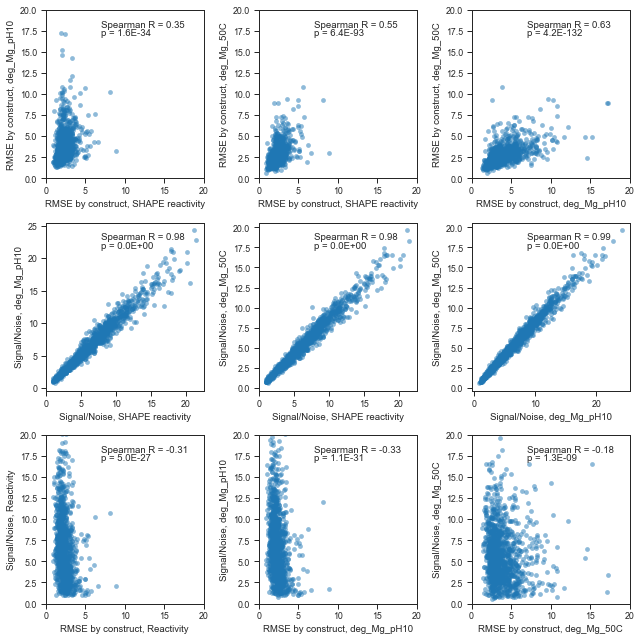

In [8]:
figure(figsize=(9,9))

subplot(3,3,1)
sns.scatterplot(x='rmse_reactivity',y='rmse_deg_Mg_pH10',data=nr_df,linewidth=0, alpha=0.5)
xlabel('RMSE by construct, SHAPE reactivity')
ylabel('RMSE by construct, deg_Mg_pH10')
corrfunc(nr_df['rmse_reactivity'], nr_df['rmse_deg_Mg_pH10'],pval=True)
xlim([0,20])
ylim([0,20])

subplot(3,3,2)
sns.scatterplot(x='rmse_reactivity',y='rmse_deg_Mg_50C',data=nr_df,linewidth=0, alpha=0.5)
xlabel('RMSE by construct, SHAPE reactivity')
ylabel('RMSE by construct, deg_Mg_50C')
corrfunc(nr_df['rmse_reactivity'], nr_df['rmse_deg_Mg_50C'],pval=True)
xlim([0,20])
ylim([0,20])

subplot(3,3,3)
sns.scatterplot(x='rmse_deg_Mg_pH10',y='rmse_deg_Mg_50C',data=nr_df,linewidth=0, alpha=0.5)
xlabel('RMSE by construct, deg_Mg_pH10')
ylabel('RMSE by construct, deg_Mg_50C')
corrfunc(nr_df['rmse_deg_Mg_pH10'], nr_df['rmse_deg_Mg_50C'],pval=True)
xlim([0,20])
ylim([0,20])

subplot(3,3,4)
sns.scatterplot(x='signal_to_noise_reactivity',y='signal_to_noise_deg_Mg_pH10',data=nr_df,linewidth=0, alpha=0.5)
corrfunc(nr_df['signal_to_noise_reactivity'], nr_df['signal_to_noise_deg_Mg_pH10'],pval=True)
xlabel('Signal/Noise, SHAPE reactivity')
ylabel('Signal/Noise, deg_Mg_pH10')

subplot(3,3,5)
sns.scatterplot(x='signal_to_noise_reactivity',y='signal_to_noise_deg_Mg_50C',data=nr_df,linewidth=0, alpha=0.5)
corrfunc(nr_df['signal_to_noise_reactivity'], nr_df['signal_to_noise_deg_Mg_50C'],pval=True)
xlabel('Signal/Noise, SHAPE reactivity')
ylabel('Signal/Noise, deg_Mg_50C')


subplot(3,3,6)
sns.scatterplot(x='signal_to_noise_deg_Mg_pH10',y='signal_to_noise_deg_Mg_50C',data=nr_df,linewidth=0, alpha=0.5)
corrfunc(nr_df['signal_to_noise_deg_Mg_pH10'], nr_df['signal_to_noise_deg_Mg_50C'],pval=True)
xlabel('Signal/Noise, deg_Mg_pH10')
ylabel('Signal/Noise, deg_Mg_50C')

subplot(3,3,7)
sns.scatterplot(x='rmse_reactivity',y='signal_to_noise_reactivity',data=nr_df,linewidth=0, alpha=0.5)
corrfunc(nr_df['rmse_reactivity'], nr_df['signal_to_noise_reactivity'],pval=True)
xlabel('RMSE by construct, Reactivity')
ylabel('Signal/Noise, Reactivity')

xlim([0,20])
ylim([0,20])

subplot(3,3,8)
sns.scatterplot(x='rmse_reactivity',y='signal_to_noise_deg_Mg_pH10',data=nr_df,linewidth=0, alpha=0.5)
corrfunc(nr_df['rmse_reactivity'], nr_df['signal_to_noise_deg_Mg_pH10'],pval=True)

xlabel('RMSE by construct, deg_Mg_pH10')
ylabel('Signal/Noise, deg_Mg_pH10')


xlim([0,20])
ylim([0,20])

subplot(3,3,9)
sns.scatterplot(x='rmse_deg_Mg_pH10',y='signal_to_noise_deg_Mg_50C',data=nr_df,linewidth=0, alpha=0.5)
corrfunc(nr_df['rmse_deg_Mg_pH10'], nr_df['signal_to_noise_deg_Mg_50C'],pval=True)
xlim([0,20])
ylim([0,20])
xlabel('RMSE by construct, deg_Mg_50C')
ylabel('Signal/Noise, deg_Mg_50C')

tight_layout()

savefig('RMSE_SI_deep_dive.png',dpi=300, bbox_inches='tight')

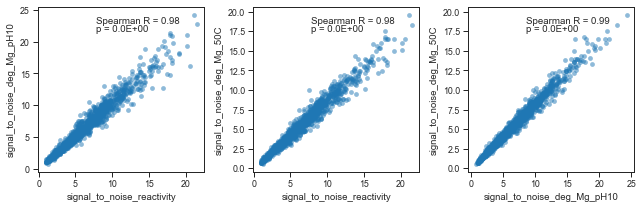

In [32]:
figure(figsize=(9,3))

tight_layout()


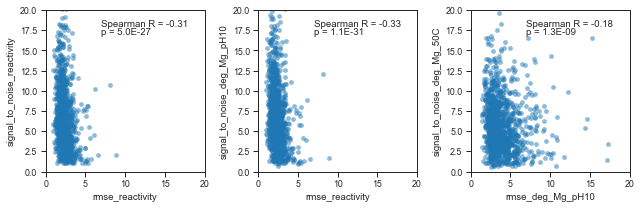

In [31]:


tight_layout()

In [26]:
nr_df.keys()

Index(['level_0', 'deg_50C', 'deg_Mg_50C', 'deg_Mg_pH10', 'deg_pH10', 'id',
       'reactivity', 'index', 'sequence', 'structure', 'predicted_loop_type',
       'seq_length', 'seq_scored', 'EternaScore', 'test_filter',
       'errors_reactivity', 'errors_deg_Mg_50C', 'errors_deg_Mg_pH10',
       'rmse_deg_Mg_50C', 'rmse_vec_deg_Mg_50C', 'rmse_deg_Mg_pH10',
       'rmse_vec_deg_Mg_pH10', 'rmse_reactivity', 'rmse_vec_reactivity'],
      dtype='object')

In [15]:
corrfunc??

Signature:
corrfunc(
    x,
    y,
    draw_line=False,
    method='spearman',
    make_title=False,
    ax=None,
    **kws,
)
Docstring: <no docstring>
Source:   
def corrfunc(x,y, draw_line=False, method='spearman', make_title=False, ax=None, **kws):

    if method=='spearman':
        r, pval = spearmanr(x, y, nan_policy='omit')
    elif method=='pearson':
        r, pval = pearsonr(x, y)

    ax = ax or plt.gca() 

    if draw_line:
        m, b = np.poly1d(np.polyfit(x, y, 1))
        xmin, xmax = ax.get_xlim()
        plt.plot([xmin,xmax],[xmin*m+b,xmax*m+b],c='k',linestyle=':')
        ax.set_xlim([xmin,xmax])

    if make_title:
        if method=='spearman':
            ax.set_title(f'Spearman R = {r:.2f}',loc='right')
        elif method=='pearson':
            ax.set_title(f'Pearson R = {r:.2f}',loc='right')
    else:
        if method=='spearman':
            ax.annotate(f'Spearman R = {r:.2f}', xycoords='axes fraction',xy=(0.1,0.9))
        elif method=='pearson':
        

In [35]:
nr_df['median_deg_Mg_pH10_signal'] = nr_df.apply(lambda row: np.median(row['deg_Mg_pH10']),axis=1)


Text(0, 0.5, 'RMSE per construct, deg Mg pH 10')

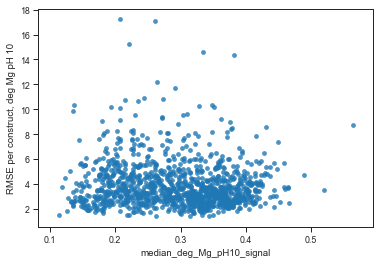

In [36]:

sns.scatterplot(x='median_deg_Mg_pH10_signal',y='rmse_deg_Mg_pH10',data=nr_df,alpha=0.8,linewidth=0)
ylabel('RMSE per construct, deg Mg pH 10')

# Don't see higher RMSE for lower signal

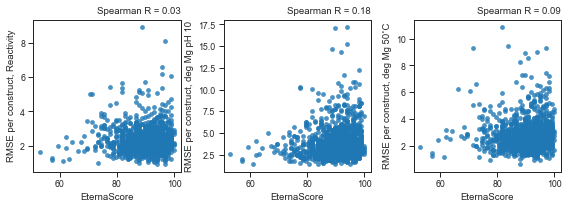

In [29]:
figure(figsize=(8,3))
subplot(1,3,1)
title('Spearman R = 0.03',loc='right')
sns.scatterplot(x='EternaScore',y='rmse_reactivity',data=nr_df,alpha=0.8,linewidth=0)
ylabel('RMSE per construct, Reactivity')
subplot(1,3,2)
title('Spearman R = 0.18',loc='right')

sns.scatterplot(x='EternaScore',y='rmse_deg_Mg_pH10',data=nr_df,alpha=0.8,linewidth=0)
ylabel('RMSE per construct, deg Mg pH 10')

subplot(1,3,3)
title('Spearman R = 0.09',loc='right')
sns.scatterplot(x='EternaScore',y='rmse_deg_Mg_50C',data=nr_df,alpha=0.8,linewidth=0)
ylabel('RMSE per construct, deg Mg 50˚C')

tight_layout()
savefig('../../../Paper/Figures/SI_EternaScore.pdf',bbox_inches='tight')

level_0     index  seq_length  seq_scored  EternaScore  \
level_0           1.000000 -0.048527         NaN         NaN     0.007403   
index            -0.048527  1.000000         NaN         NaN     0.025157   
seq_length             NaN       NaN         NaN         NaN          NaN   
seq_scored             NaN       NaN         NaN         NaN          NaN   
EternaScore       0.007403  0.025157         NaN         NaN     1.000000   
test_filter            NaN       NaN         NaN         NaN          NaN   
rmse_deg_Mg_50C  -0.052156 -0.030216         NaN         NaN     0.090335   
rmse_deg_Mg_pH10 -0.019776 -0.029692         NaN         NaN     0.182296   
rmse_reactivity  -0.065582  0.021525         NaN         NaN     0.033737   

                  test_filter  rmse_deg_Mg_50C  rmse_deg_Mg_pH10  \
level_0                   NaN        -0.052156         -0.019776   
index                     NaN        -0.030216         -0.029692   
seq_length                NaN              NaN               NaN   
seq_scored                NaN              NaN               NaN   
EternaScore               NaN         0.090335          0.182296   
test_filter               NaN              NaN               NaN   
rmse_deg_Mg_50C           NaN         1.000000          0.632747   
rmse_deg_Mg_pH10          NaN         0.632747          1.000000   
rmse_reactivity           NaN         0.548237          0.347191   

                  rmse_reactivity  
level_0                 -0.065582  
index                    0.021525  
seq_length                    NaN  
seq_scored                    NaN  
EternaScore              0.033737  
test_filter                   NaN  
rmse_deg_Mg_50C          0.548237  
rmse_deg_Mg_pH10         0.347191  
rmse_reactivity          1.000000

In [30]:
melt_nr = melt_on_nt(nr_df,  ['deg_Mg_50C', 'deg_Mg_pH10', 'reactivity','errors_deg_Mg_50C', 'errors_deg_Mg_pH10', 'errors_reactivity',\
'rmse_vec_deg_Mg_50C', 'rmse_vec_deg_Mg_pH10', 'rmse_vec_reactivity'], ['sequence','predicted_loop_type','structure'])

melt_df = melt_on_nt(df,['deg_Mg_50C', 'deg_Mg_pH10', 'reactivity', 'errors_deg_Mg_50C', 'errors_deg_Mg_pH10'],['sequence','predicted_loop_type','structure'])

for typ in ['deg_Mg_50C', 'deg_Mg_pH10', 'reactivity']:
    melt_nr['diff_to_err_%s' % typ] = melt_nr['rmse_vec_%s' % typ] - melt_nr['errors_%s' % typ]

trimming sequence
trimming predicted_loop_type
trimming structure
deg_Mg_50C 106652
deg_Mg_pH10 106652
reactivity 106652
errors_deg_Mg_50C 106652
errors_deg_Mg_pH10 106652
errors_reactivity 106652
rmse_vec_deg_Mg_50C 106652
rmse_vec_deg_Mg_pH10 106652
rmse_vec_reactivity 106652
sequence 106652
predicted_loop_type 106652
structure 106652
trimming sequence
trimming predicted_loop_type
trimming structure
deg_Mg_50C 106652
deg_Mg_pH10 106652
reactivity 106652
errors_deg_Mg_50C 106652
errors_deg_Mg_pH10 106652
sequence 106652
predicted_loop_type 106652
structure 106652


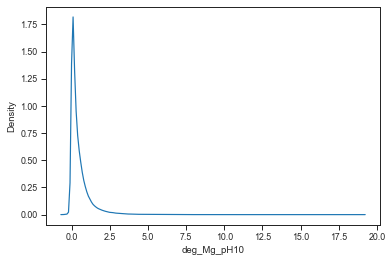

In [47]:
sns.kdeplot(melt_df['deg_Mg_pH10'])

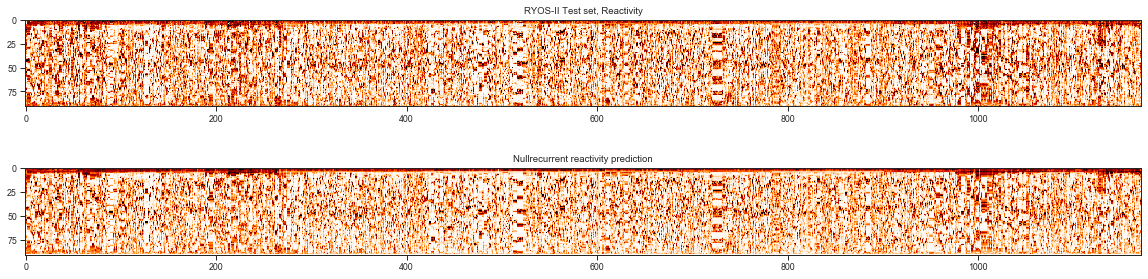

In [45]:
figure(figsize=(20,5))
subplot(2,1,1)
imshow(melt_df['reactivity'].values.reshape(1172,91).T,cmap='gist_heat_r',vmin=0,vmax=2)
title('RYOS-II Test set, Reactivity')

subplot(2,1,2)
title('Nullrecurrent reactivity prediction')
imshow(melt_nr['reactivity'].values.reshape(1172,91).T,cmap='gist_heat_r',vmin=0, vmax=2)

savefig('reactivity_vs_nr_test_set.pdf',bbox_inches='tight')

In [46]:
! open reactivity_vs_nr_test_set.pdf

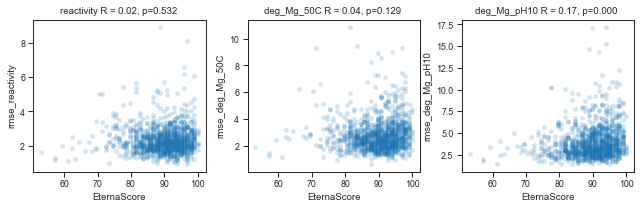

In [8]:
from scipy.stats import spearmanr

figure(figsize=(9,3))
for j, typ in enumerate(['reactivity', 'deg_Mg_50C', 'deg_Mg_pH10']):
    subplot(1,3,j+1)
    sns.scatterplot(x='EternaScore',y='rmse_'+typ,data=nr_df, alpha=0.2,linewidth=0)
    r, p = pearsonr(nr_df['EternaScore'], nr_df['rmse_'+typ])
    title("%s R = %.2f, p=%.3f " % (typ, r,p))
    
tight_layout()
savefig('RMSE_vs_EternaScore.pdf',bbox_inches='tight')
savefig('RMSE_vs_EternaScore.png', dpi=300, bbox_inches='tight')

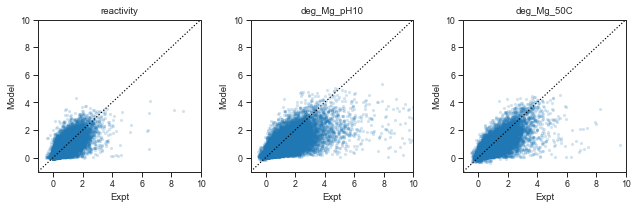

In [26]:
figure(figsize=(9,3))
xmax=10
for j, typ in enumerate(['reactivity', 'deg_Mg_pH10','deg_Mg_50C', ]):
    subplot(1,3,j+1)
    scatter(melt_df[typ], melt_nr[typ], alpha=0.2,linewidth=0,s=10)
    xlabel('Expt')
    ylabel('Model')
    plot([-1,xmax],[-1,xmax],color='k',linestyle=':')
    xlim([-1,10])
    ylim([-1,10])
    title(typ)
tight_layout()

savefig('raw_values_of_nts_nr_vs_expt.pdf',bbox_inches='tight')
savefig('raw_values_of_nts_nr_vs_expt.png', dpi=300, bbox_inches='tight')

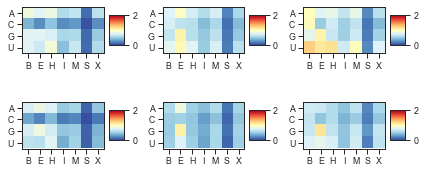

In [555]:
for j, typ in enumerate(['reactivity', 'deg_Mg_50C', 'deg_Mg_pH10']):
    subplot(3,3,j+1)
    imshow(np.array(melt_df.groupby(['sequence','predicted_loop_type'])[typ].mean()).reshape(4,7),
           cmap='RdYlBu_r',vmin=0,vmax=2)
    colorbar(aspect=2)
    yticks(range(4),list('ACGU'))
    xticks(range(7),list('BEHIMSX'))
    #title("%s, Model RMSE" % typ)
    
for j, typ in enumerate(['reactivity', 'deg_Mg_50C', 'deg_Mg_pH10']):
    subplot(3,3,j+4)
    imshow(np.array(melt_nr.groupby(['sequence','predicted_loop_type'])[typ].mean()).reshape(4,7),
           cmap='RdYlBu_r',vmin=0,vmax=2)
    colorbar(aspect=2)
    yticks(range(4),list('ACGU'))
    xticks(range(7),list('BEHIMSX'))
    #title("%s, Model RMSE" % typ)
    
tight_layout()

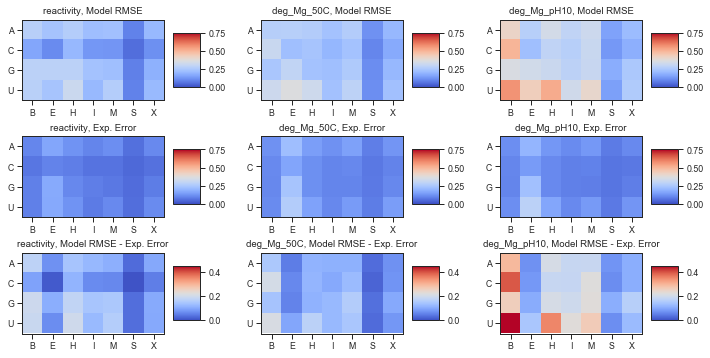

In [511]:
figure(figsize=(10,5))
for j, typ in enumerate(['reactivity', 'deg_Mg_50C', 'deg_Mg_pH10']):
    subplot(3,3,j+1)
    imshow(np.array(melt_nr.groupby(['sequence','predicted_loop_type'])['rmse_vec_%s' % typ].mean()).reshape(4,7),
           cmap='coolwarm',vmin=0,vmax=0.75)
    colorbar(aspect=2)
    yticks(range(4),list('ACGU'))
    xticks(range(7),list('BEHIMSX'))
    title("%s, Model RMSE" % typ)
    
for j, typ in enumerate(['reactivity', 'deg_Mg_50C', 'deg_Mg_pH10']):
    subplot(3,3,j+4)
    imshow(np.array(melt_nr.groupby(['sequence','predicted_loop_type'])['errors_%s' % typ].mean()).reshape(4,7),
           cmap='coolwarm',vmin=0,vmax=0.75)
    colorbar(aspect=2)
    yticks(range(4),list('ACGU'))
    xticks(range(7),list('BEHIMSX'))
    title("%s, Exp. Error" % typ)
    
for j, typ in enumerate(['reactivity', 'deg_Mg_50C', 'deg_Mg_pH10']):
    subplot(3,3,j+7)
    imshow(np.array(melt_nr.groupby(['sequence','predicted_loop_type'])['diff_to_err_%s' % typ].mean()).reshape(4,7),
           cmap='coolwarm',vmin=0,vmax=0.45)
    colorbar(aspect=2)
    yticks(range(4),list('ACGU'))
    xticks(range(7),list('BEHIMSX'))
    title("%s, Model RMSE - Exp. Error" % typ)
    
tight_layout()
savefig('seq_struct_decomposition_of_RMSE.pdf',bbox_inches='tight')
#external loops can't get any better
#bulges are maybe the worst

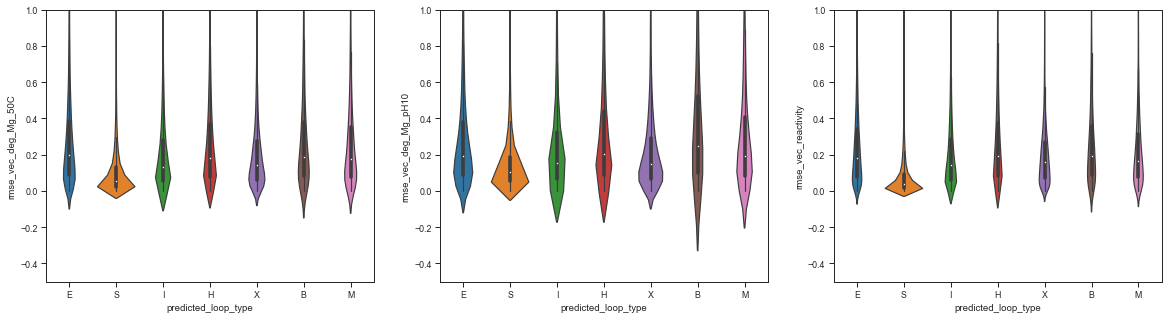

In [437]:
figure(figsize=(20,5))
for i, typ in enumerate(['deg_Mg_50C', 'deg_Mg_pH10', 'reactivity']):
    subplot(1,3,i+1)
    sns.violinplot( y='rmse_vec_%s' % typ, x='predicted_loop_type', data=melt_nr)
    ylim([-0.5,1])

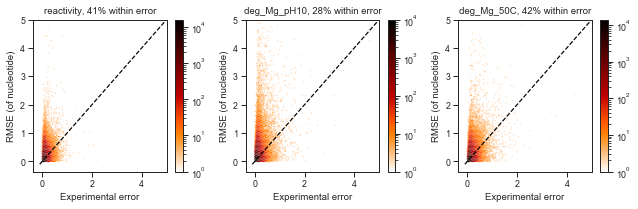

In [492]:
figure(figsize=(9,3))
for j, typ in enumerate(['reactivity','deg_Mg_pH10','deg_Mg_50C']):
    subplot(1,3,j+1)

    y=np.concatenate([x for x in nr_df['rmse_vec_%s' % typ]])
    x=np.concatenate([x[:91] for x in df['errors_%s' % typ]])
    
    title("%s, %d%% within error" % (typ,100*len(y[np.where(y<x)])/len(y)))
    hexbin(x,y,cmap='gist_heat_r',extent=[0,5,0,5],linewidth=0,norm=LogNorm())
    colorbar()
    
    plot([-0.1,5],[-0.1,5],c='k',linestyle='--')
    ylabel('RMSE (of nucleotide)')
    xlabel('Experimental error')
    
tight_layout()
savefig('Nullrecurrent_nucleotide_vs_error.pdf',bbox_inches='tight')

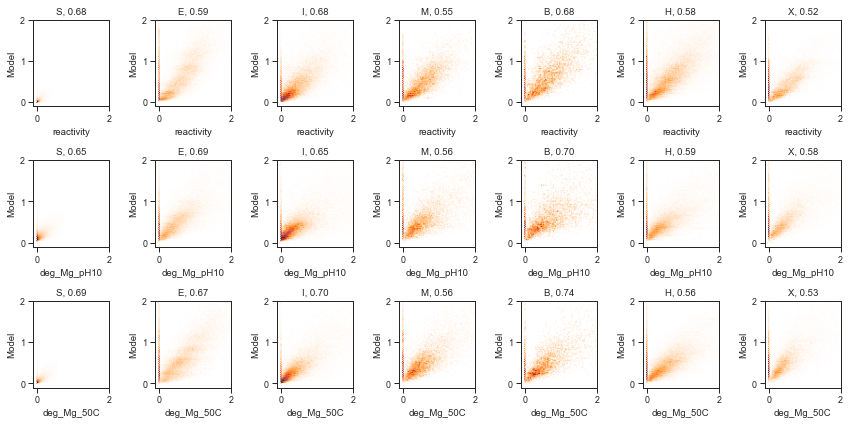

In [185]:
ctr=1
from scipy.stats import pearsonr

r_arr = np.zeros([21])

figure(figsize=(12,6))
for typ in ['reactivity','deg_Mg_pH10','deg_Mg_50C']:
    for pred in list('SEIMBHX'):
        subplot(3,7,ctr)
        x=nt_melt_df.loc[nt_melt_df.predicted_loop_type==pred][typ].values
        y=nullrecurrent_melt.loc[nullrecurrent_melt.predicted_loop_type==pred][typ].values
             
        hexbin(x,y,cmap='gist_heat_r',linewidth=0,extent=[0,3,0,3])
        xlabel(typ)
        ylabel('Model')
        ylim([-0.1,2])
        xlim([-0.1,2])
        r, pval = pearsonr(x,y) 
        title("%s, %.2f" % (pred, r ))
        r_arr[ctr-1] = r
        ctr+=1
        
tight_layout()


In [39]:
def pull_examples(model_df, gt_df, mdl_label, datatype='reactivity', kind='best'):
    if kind=='best':
        subset = model_df.sort_values('rmse_%s' % datatype).iloc[:10]
    elif kind=='worst':
        subset = model_df.sort_values('rmse_%s' % datatype).iloc[-10:]
    elif kind=='middle':
        subset = model_df.sort_values('rmse_%s' % datatype).iloc[500:510]
        
    fig, axes = plt.subplots(5,4,figsize=(40,40))
    flat_ax = axes.flatten()
    ctr=0
    for ind, row in subset.iterrows():

        vec = row[datatype]

        seq=row['sequence'][:len(vec)]
        struct = row['structure'][:len(vec)]

        design_title=gt_df.iloc[ind]['design_name'] + ", " +  str(gt_df.iloc[ind]['ID'])
        
        print(design_title)
        if datatype=='reactivity':
            draw_struct(seq, struct, c=vec, ax=flat_ax[ctr],cmap='gist_heat_r')
            
        else:
            draw_struct(seq, struct, c=vec, ax=flat_ax[ctr], line=True, cmap='gist_heat_r') # 

        title("%s\n%s" % (mdl_label, design_title),fontsize=30)

        ctr+=1
        if datatype=='reactivity':
            draw_struct(seq, struct, c=gt_df.iloc[ind][datatype][:len(seq)], ax=flat_ax[ctr],cmap='gist_heat_r')

        else:
            draw_struct(seq, struct, c=gt_df.iloc[ind][datatype][:len(seq)], line=True, ax=flat_ax[ctr],cmap='gist_heat_r') # line=True, 
            
        title("Experiment\n%s" % (design_title),fontsize=30)

        ctr+=1

In [ ]:
df.keys()

Cool shape #2, 10210876
ERROR: pairing incorrect .....((((......((..((.(((((((....)).)).))).))..)).(((((..(.((((.....(((..((.((....)))))))))
ERROR: pairing incorrect .....((((......((..((.(((((((....)).)).))).))..)).(((((..(.((((.....(((..((.((....)))))))))
ERROR: pairing incorrect .....((((......((..((.(((((((....)).)).))).))..)).(((((..(.((((.....(((..((.((....)))))))))
ERROR: pairing incorrect .....((((......((..((.(((((((....)).)).))).))..)).(((((..(.((((.....(((..((.((....)))))))))
ERROR: pairing incorrect .....((((......((..((.(((((((....)).)).))).))..)).(((((..(.((((.....(((..((.((....)))))))))
ERROR: pairing incorrect .....((((......((..((.(((((((....)).)).))).))..)).(((((..(.((((.....(((..((.((....)))))))))
ERROR: pairing incorrect .....((((......((..((.(((((((....)).)).))).))..)).(((((..(.((((.....(((..((.((....)))))))))
ERROR: pairing incorrect .....((((......((..((.(((((((....)).)).))).))..)).(((((..(.((((.....(((..((.((....)))))))))
ERROR: pairing incorrect .....((((......

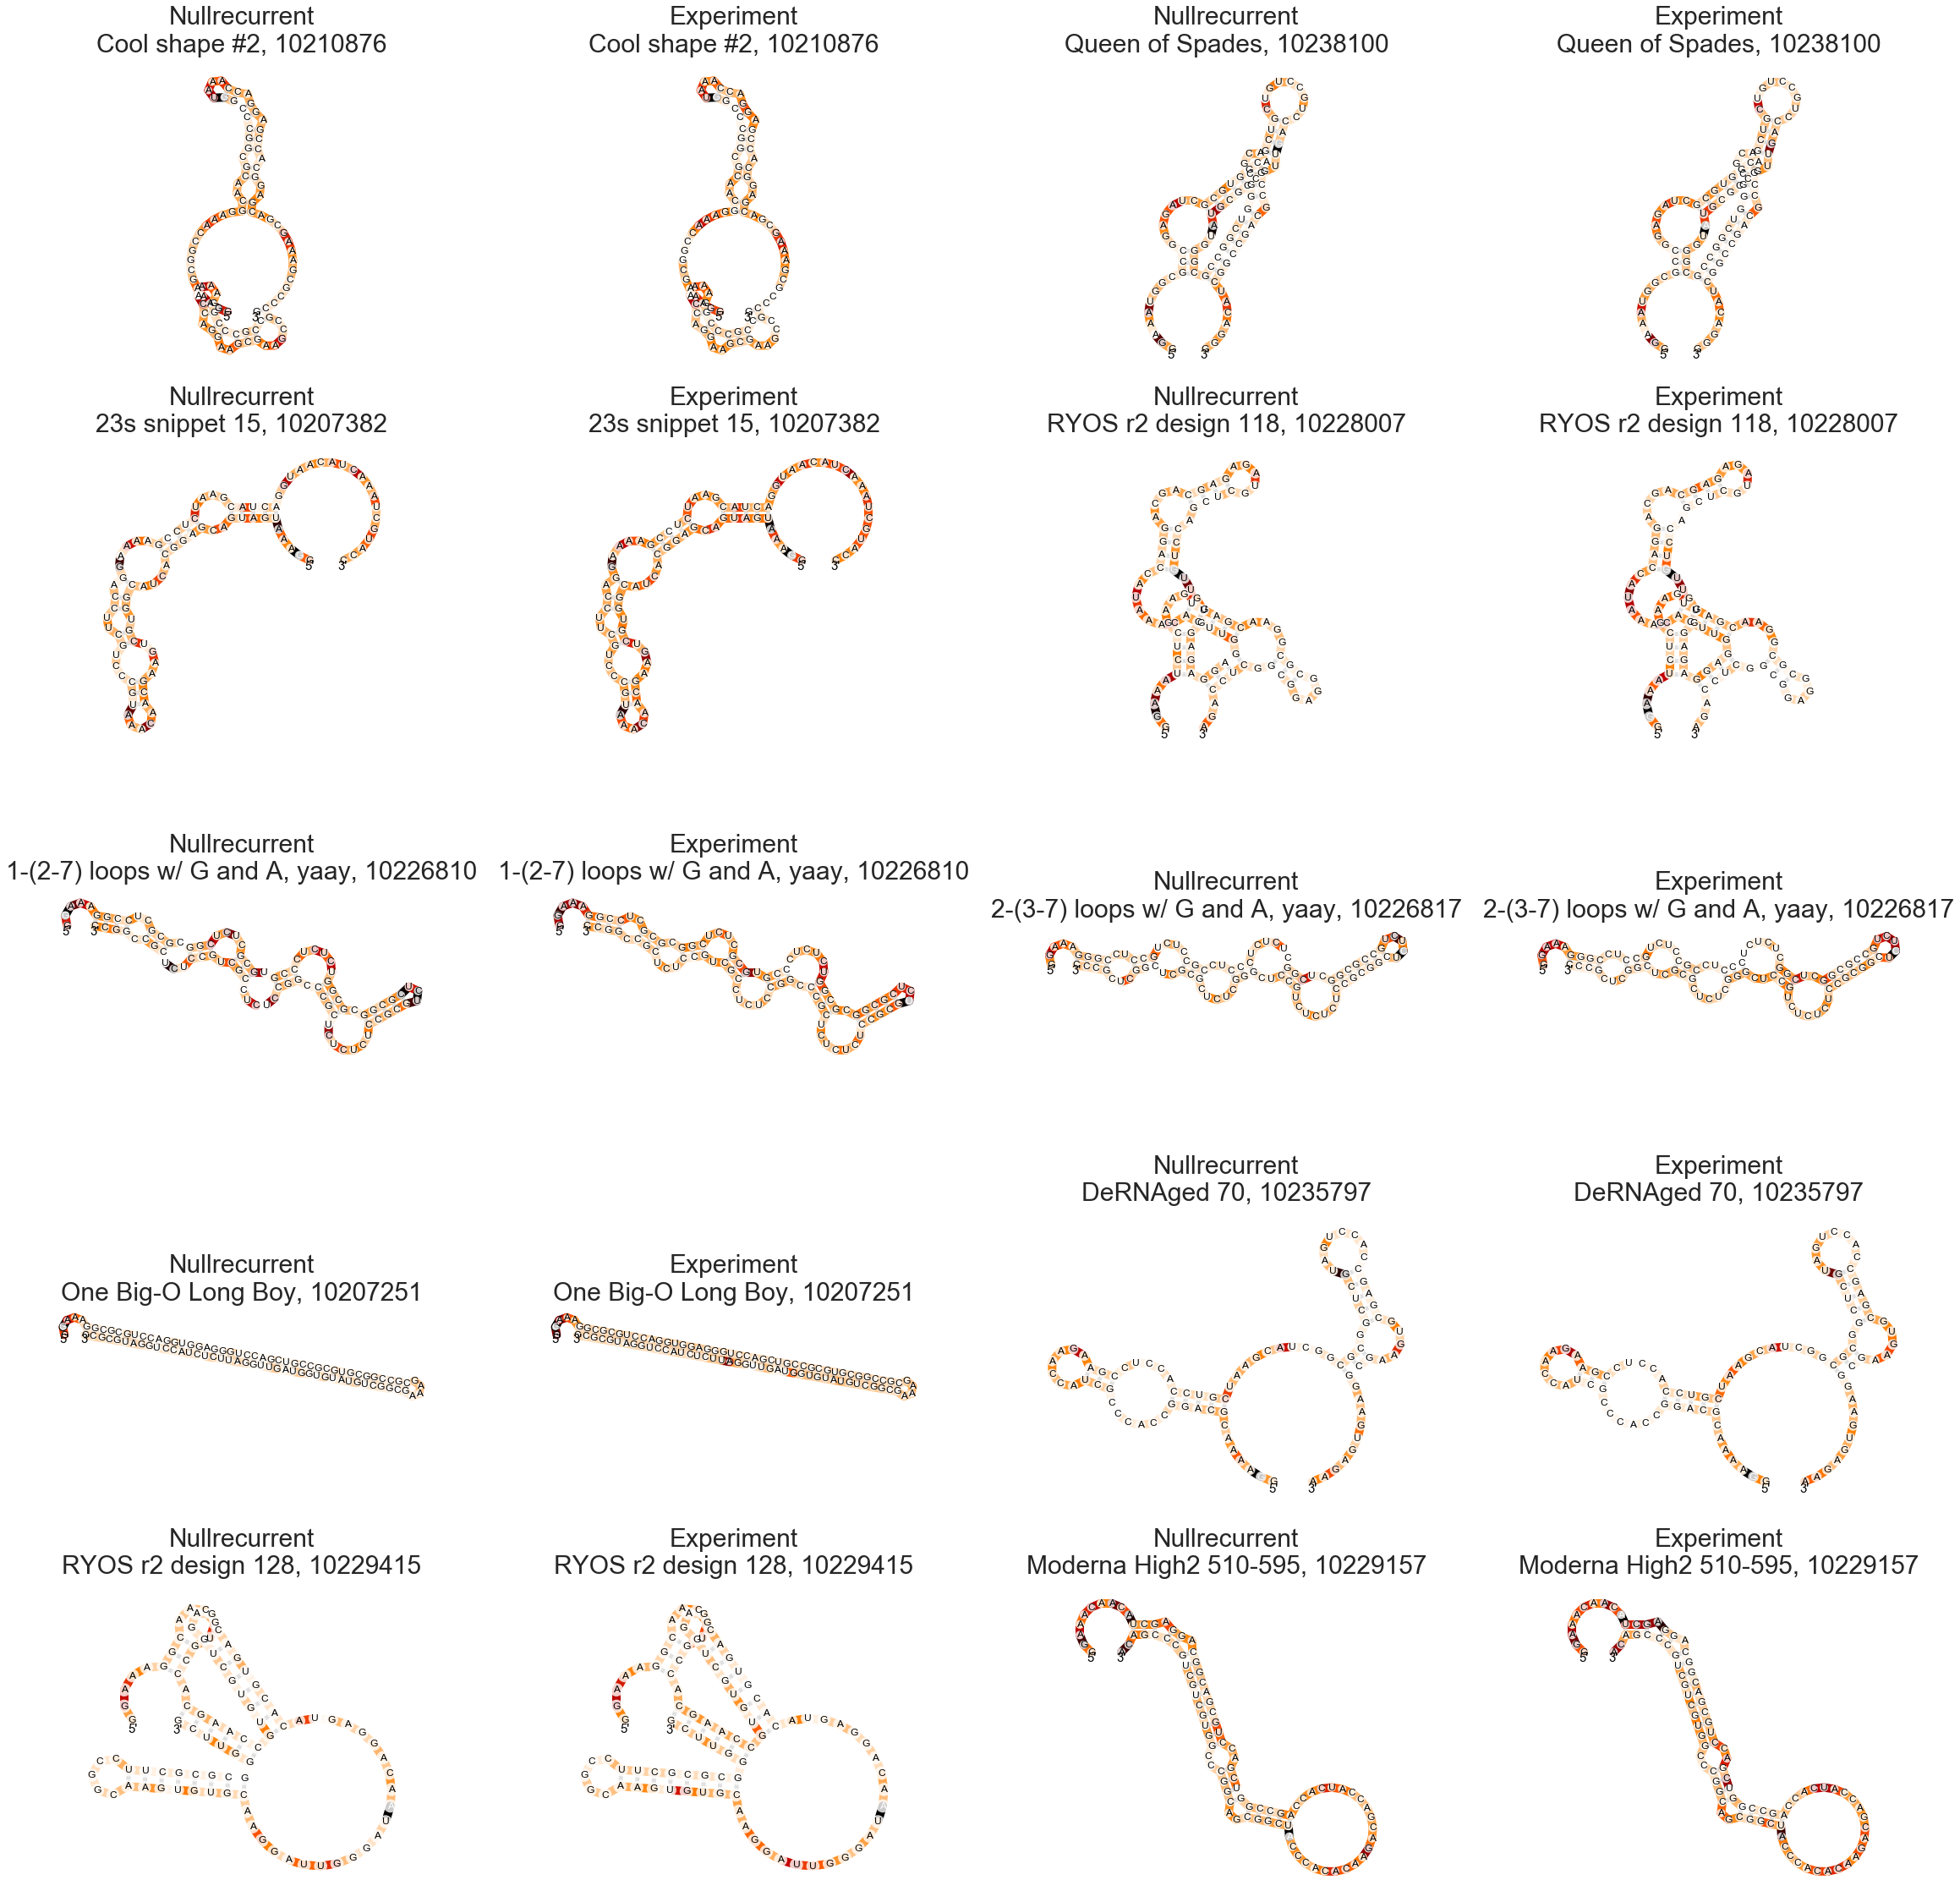

In [40]:
pull_examples(nr_df, df, 'Nullrecurrent', datatype='deg_Mg_pH10', kind='best')
savefig('Nullrecurrent_deg_Mg_pH10_best.pdf',bbox_inches='tight')

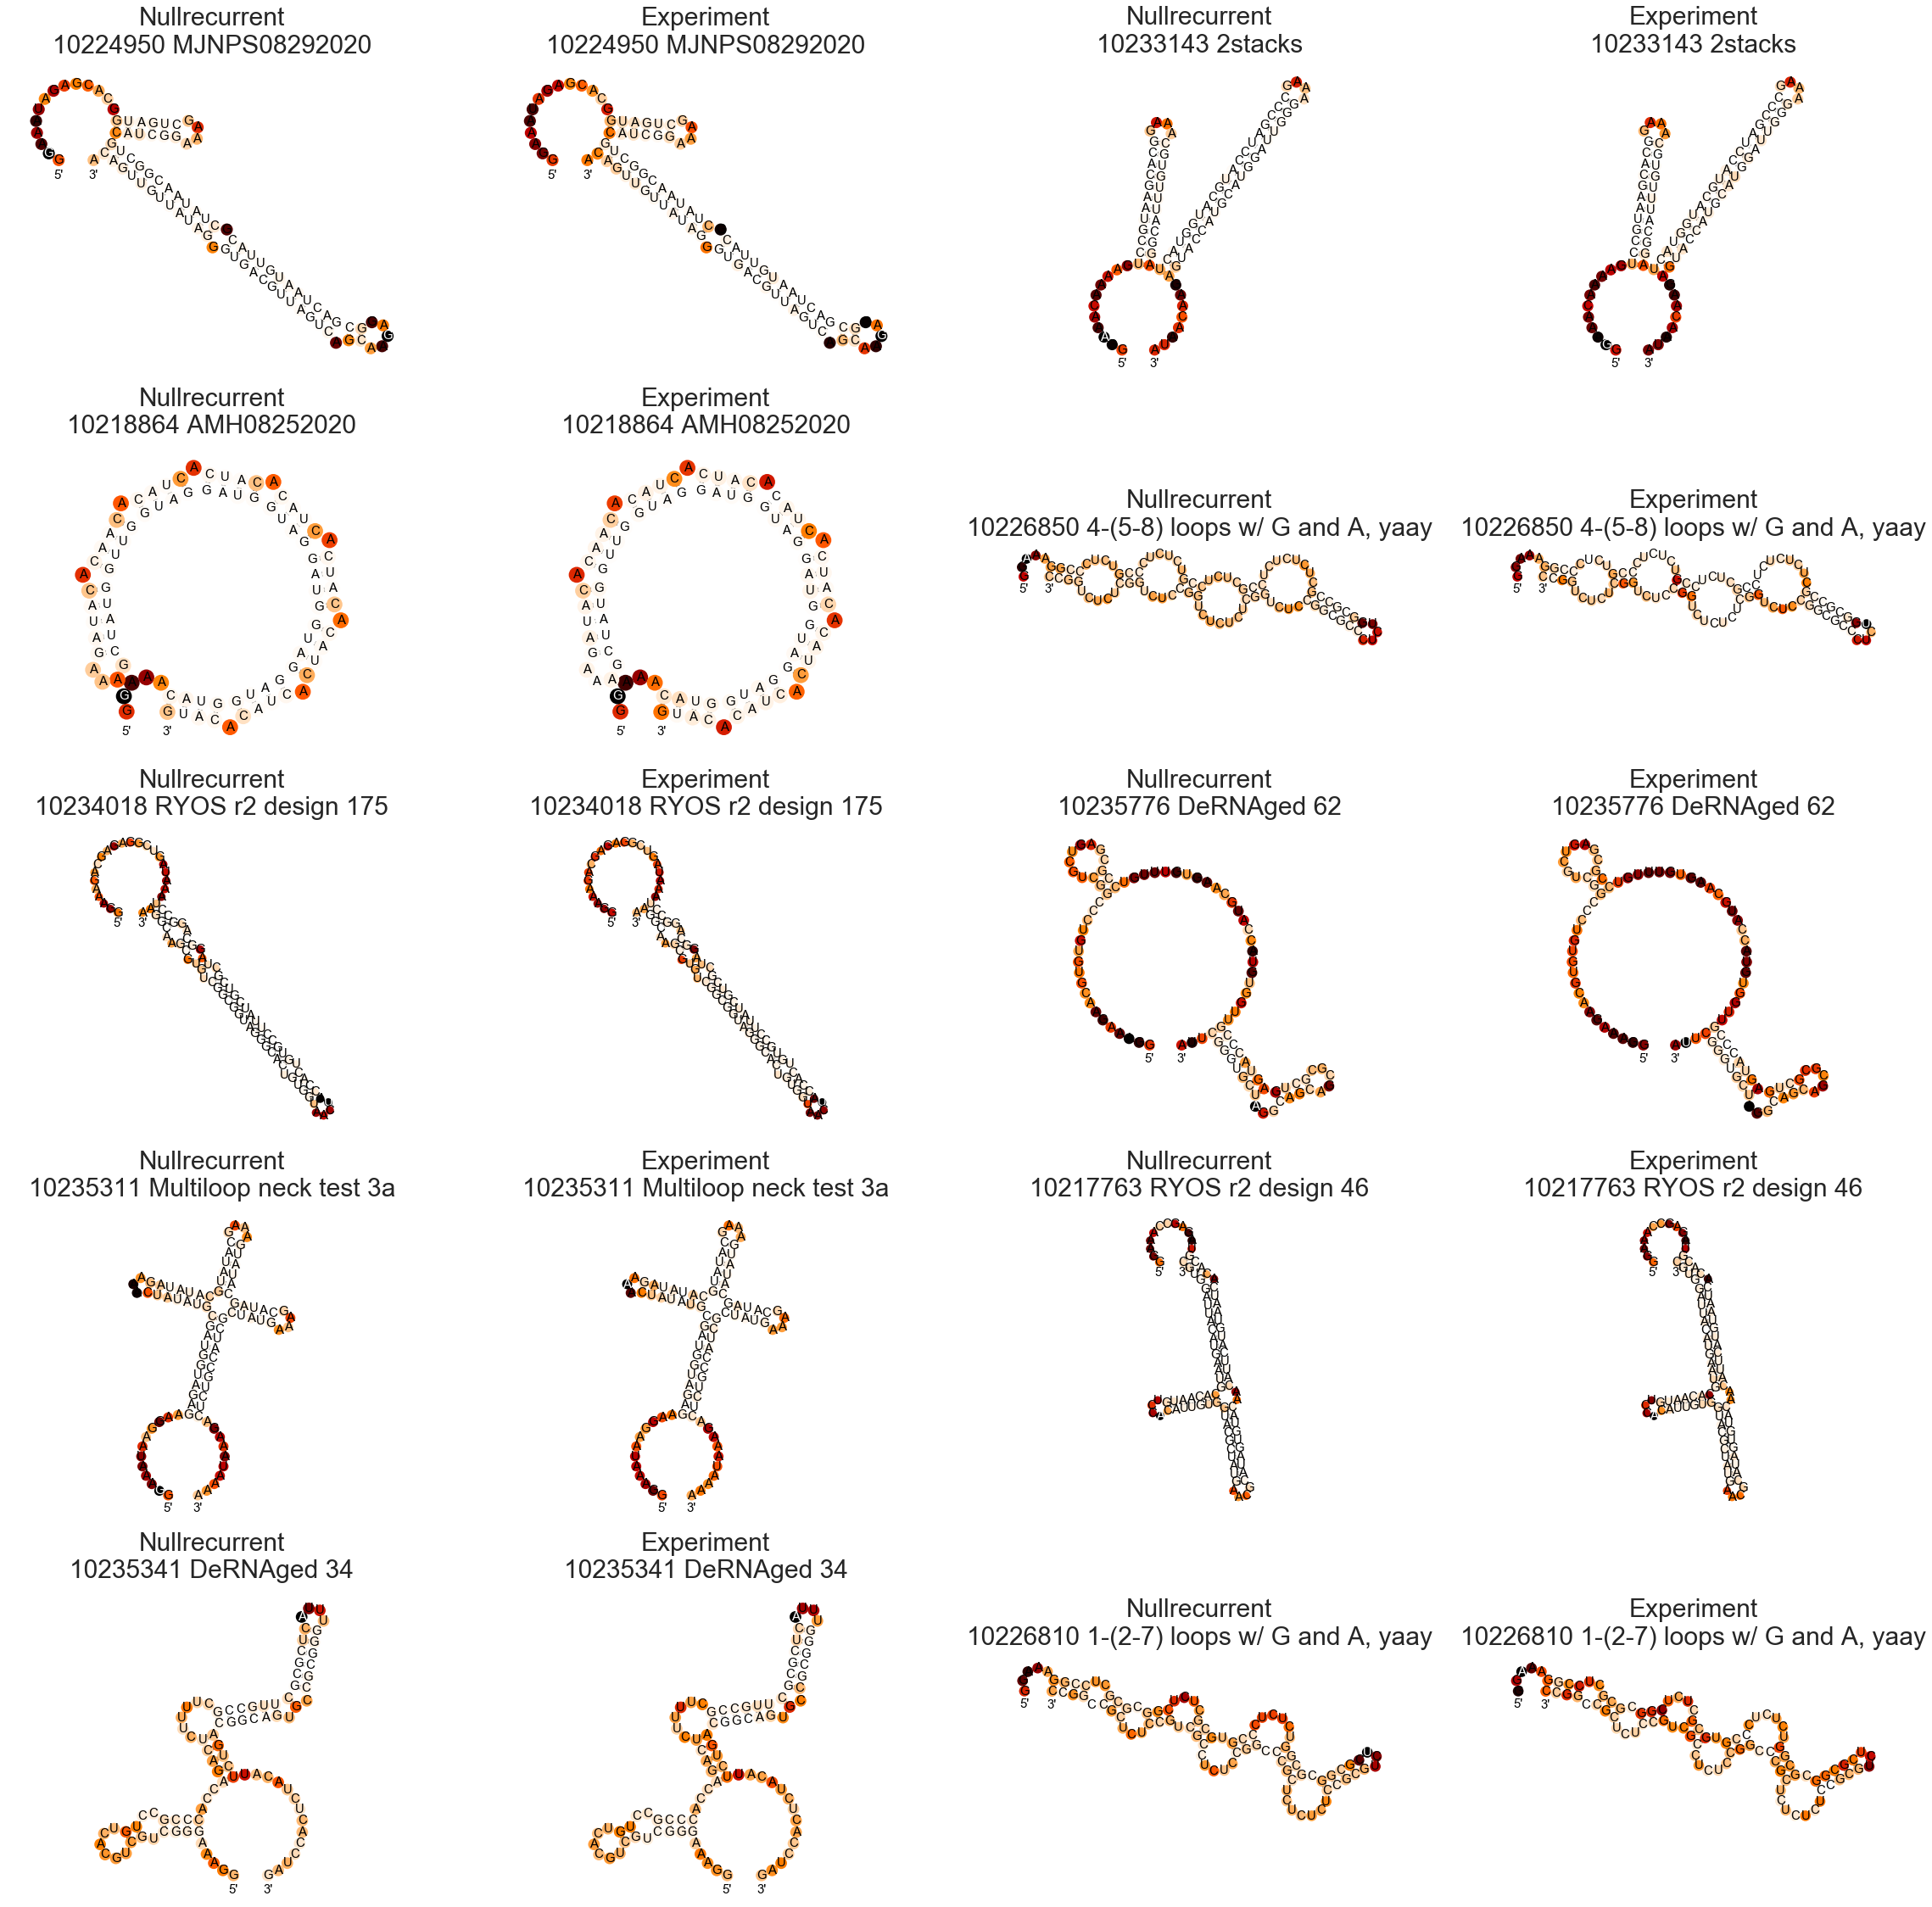

In [36]:
pull_examples(nr_df, df, 'Nullrecurrent', datatype='reactivity', kind='best')
savefig('best_reactivity.pdf',bbox_inches='tight')

Nine of Diamonds, 10237265
Triple UUUU tetraloops, 10238078
2204Sept042020, 10233615
DeRNAged 120, 10236793
JR_RYOS2_003, 10210294
RYOS r2 design 131, 10229425
RYOS r2 design 57, 10217803
RYOS r2 design 34, 10215863
DeRNAged 68, 10235793
RYOS r2 design 38, 10215885


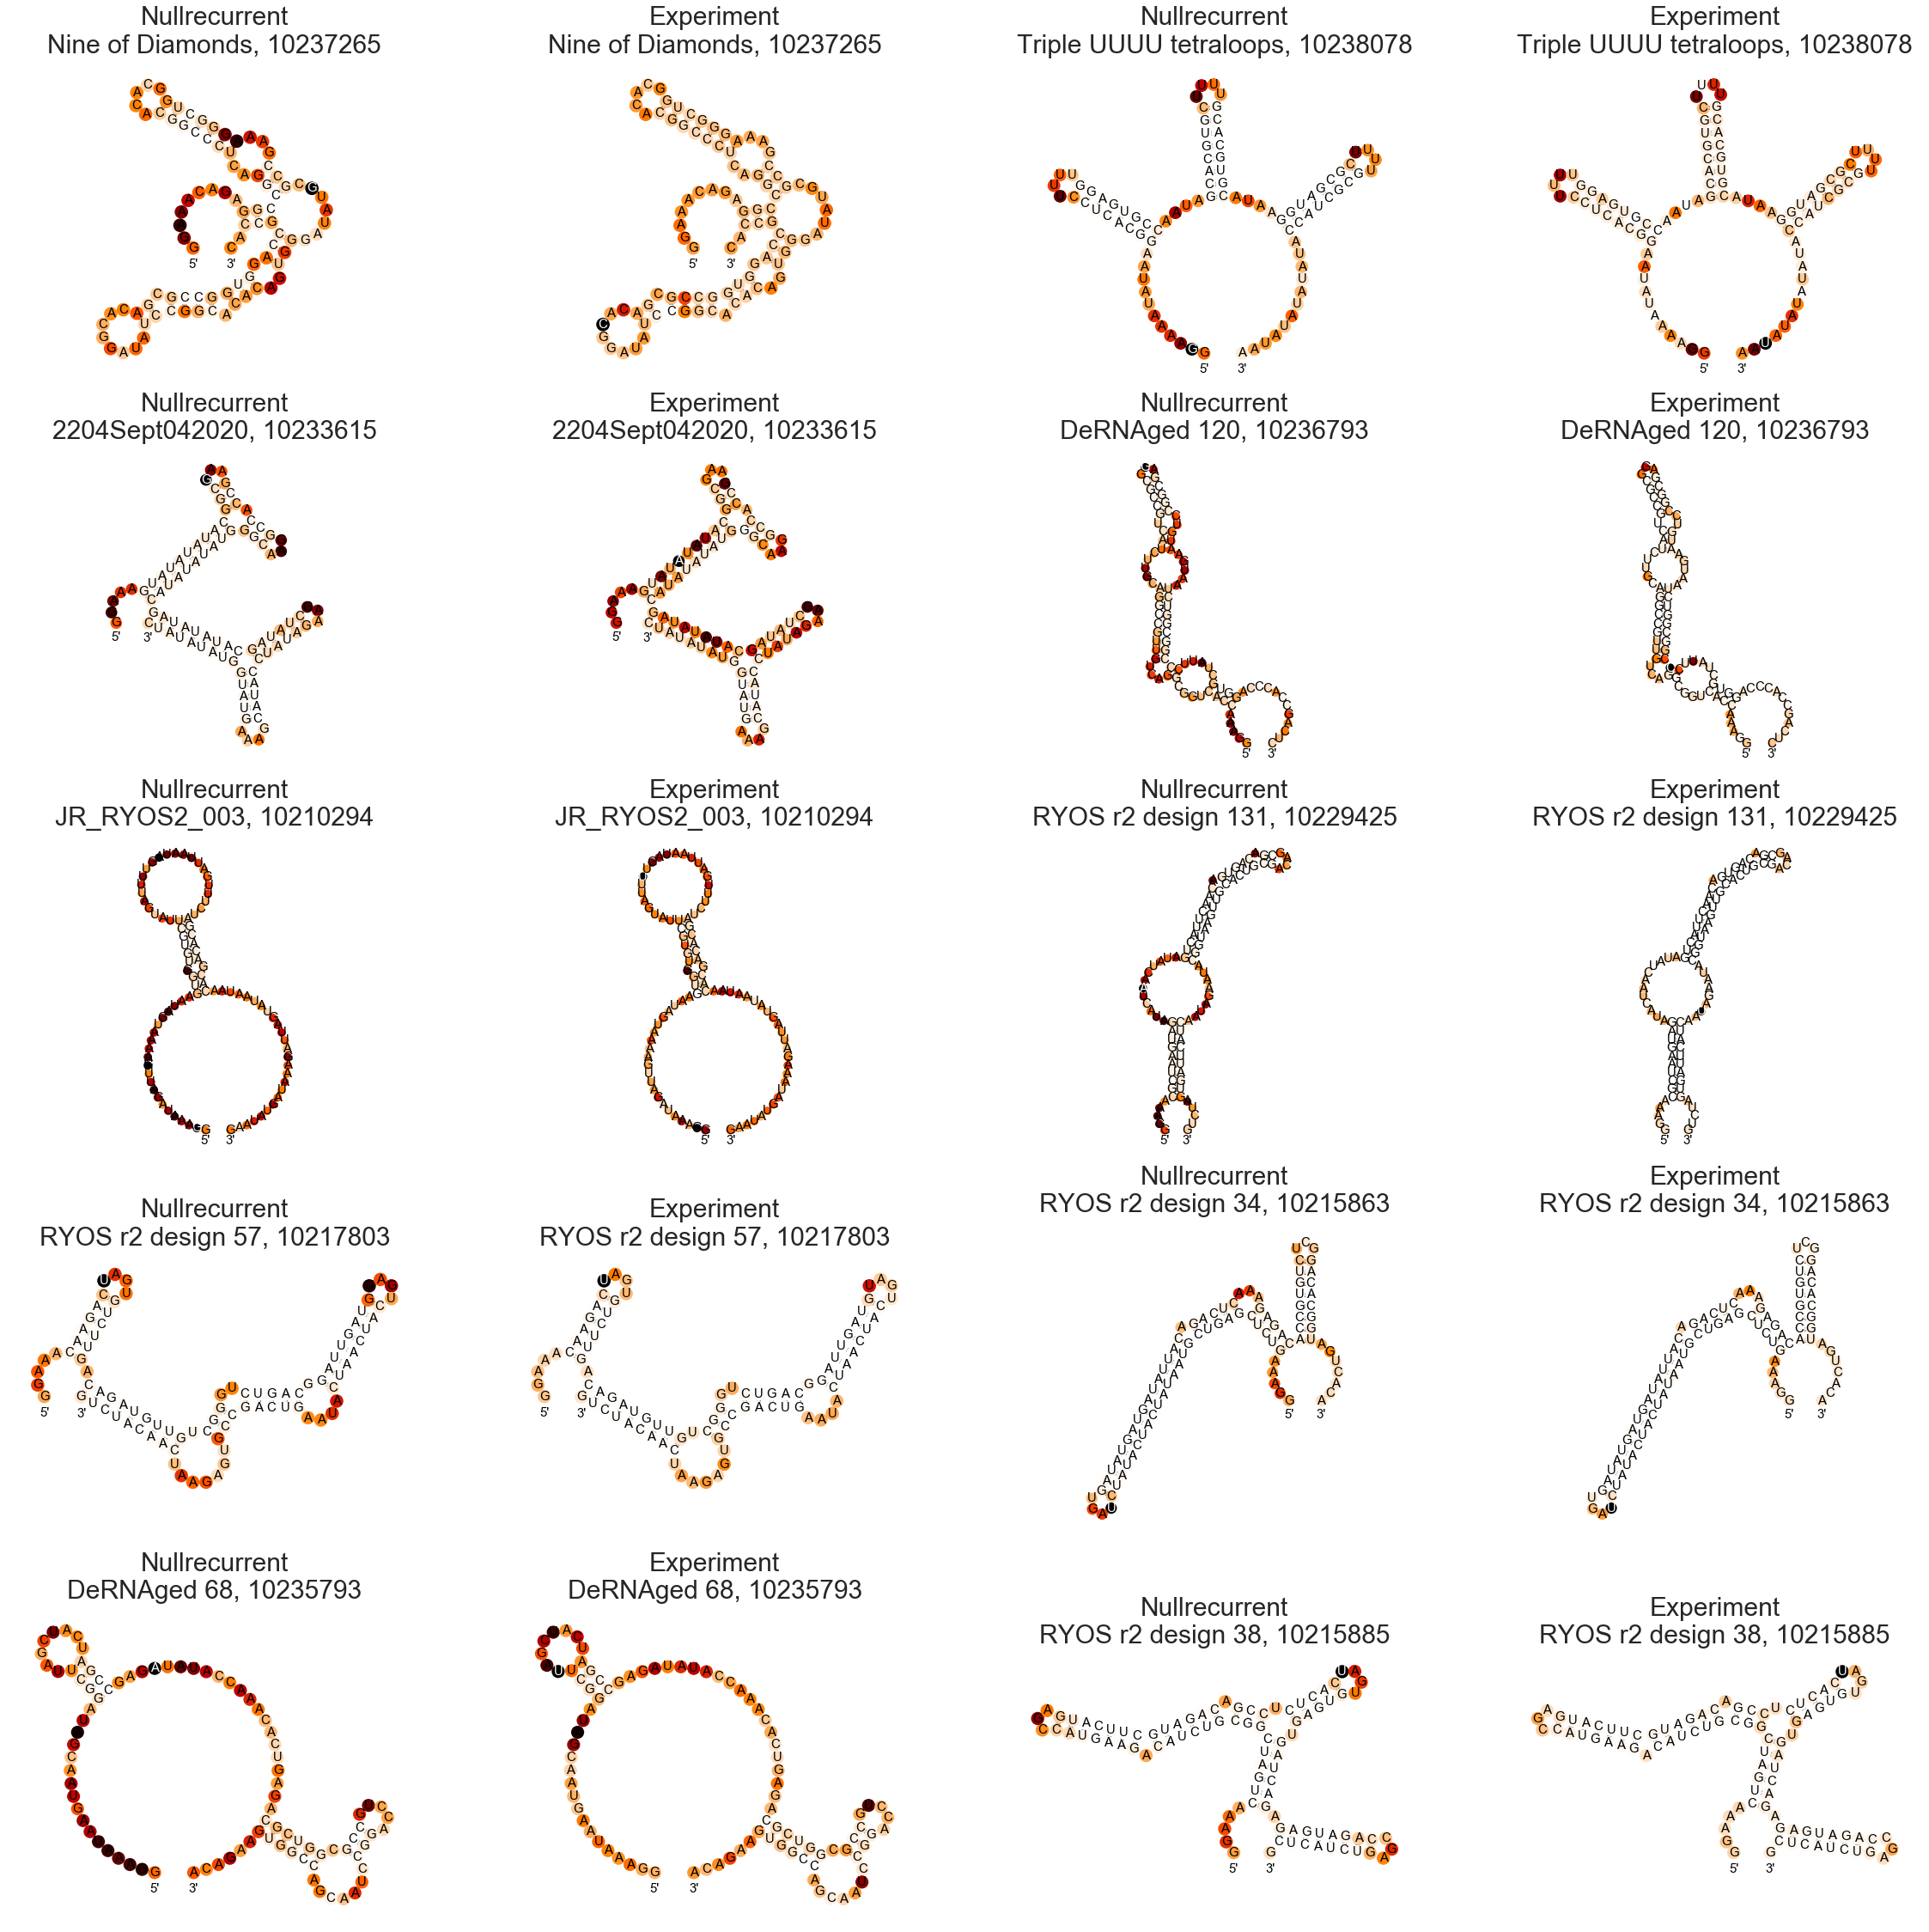

In [38]:
pull_examples(nr_df, df, 'Nullrecurrent', datatype='reactivity', kind='worst')
savefig('Nullrecurrent_reactivity_worst.pdf',bbox_inches='tight')

752
91 91
ERROR: pairing incorrect .....((((......((..((.(((((((....)).)).))).))..)).(((((..(.((((.....(((..((.((....)))))))))
ERROR: pairing incorrect .....((((......((..((.(((((((....)).)).))).))..)).(((((..(.((((.....(((..((.((....)))))))))
ERROR: pairing incorrect .....((((......((..((.(((((((....)).)).))).))..)).(((((..(.((((.....(((..((.((....)))))))))
ERROR: pairing incorrect .....((((......((..((.(((((((....)).)).))).))..)).(((((..(.((((.....(((..((.((....)))))))))
ERROR: pairing incorrect .....((((......((..((.(((((((....)).)).))).))..)).(((((..(.((((.....(((..((.((....)))))))))
ERROR: pairing incorrect .....((((......((..((.(((((((....)).)).))).))..)).(((((..(.((((.....(((..((.((....)))))))))
ERROR: pairing incorrect .....((((......((..((.(((((((....)).)).))).))..)).(((((..(.((((.....(((..((.((....)))))))))
ERROR: pairing incorrect .....((((......((..((.(((((((....)).)).))).))..)).(((((..(.((((.....(((..((.((....)))))))))
ERROR: pairing incorrect .....((((......((..((.(((((((

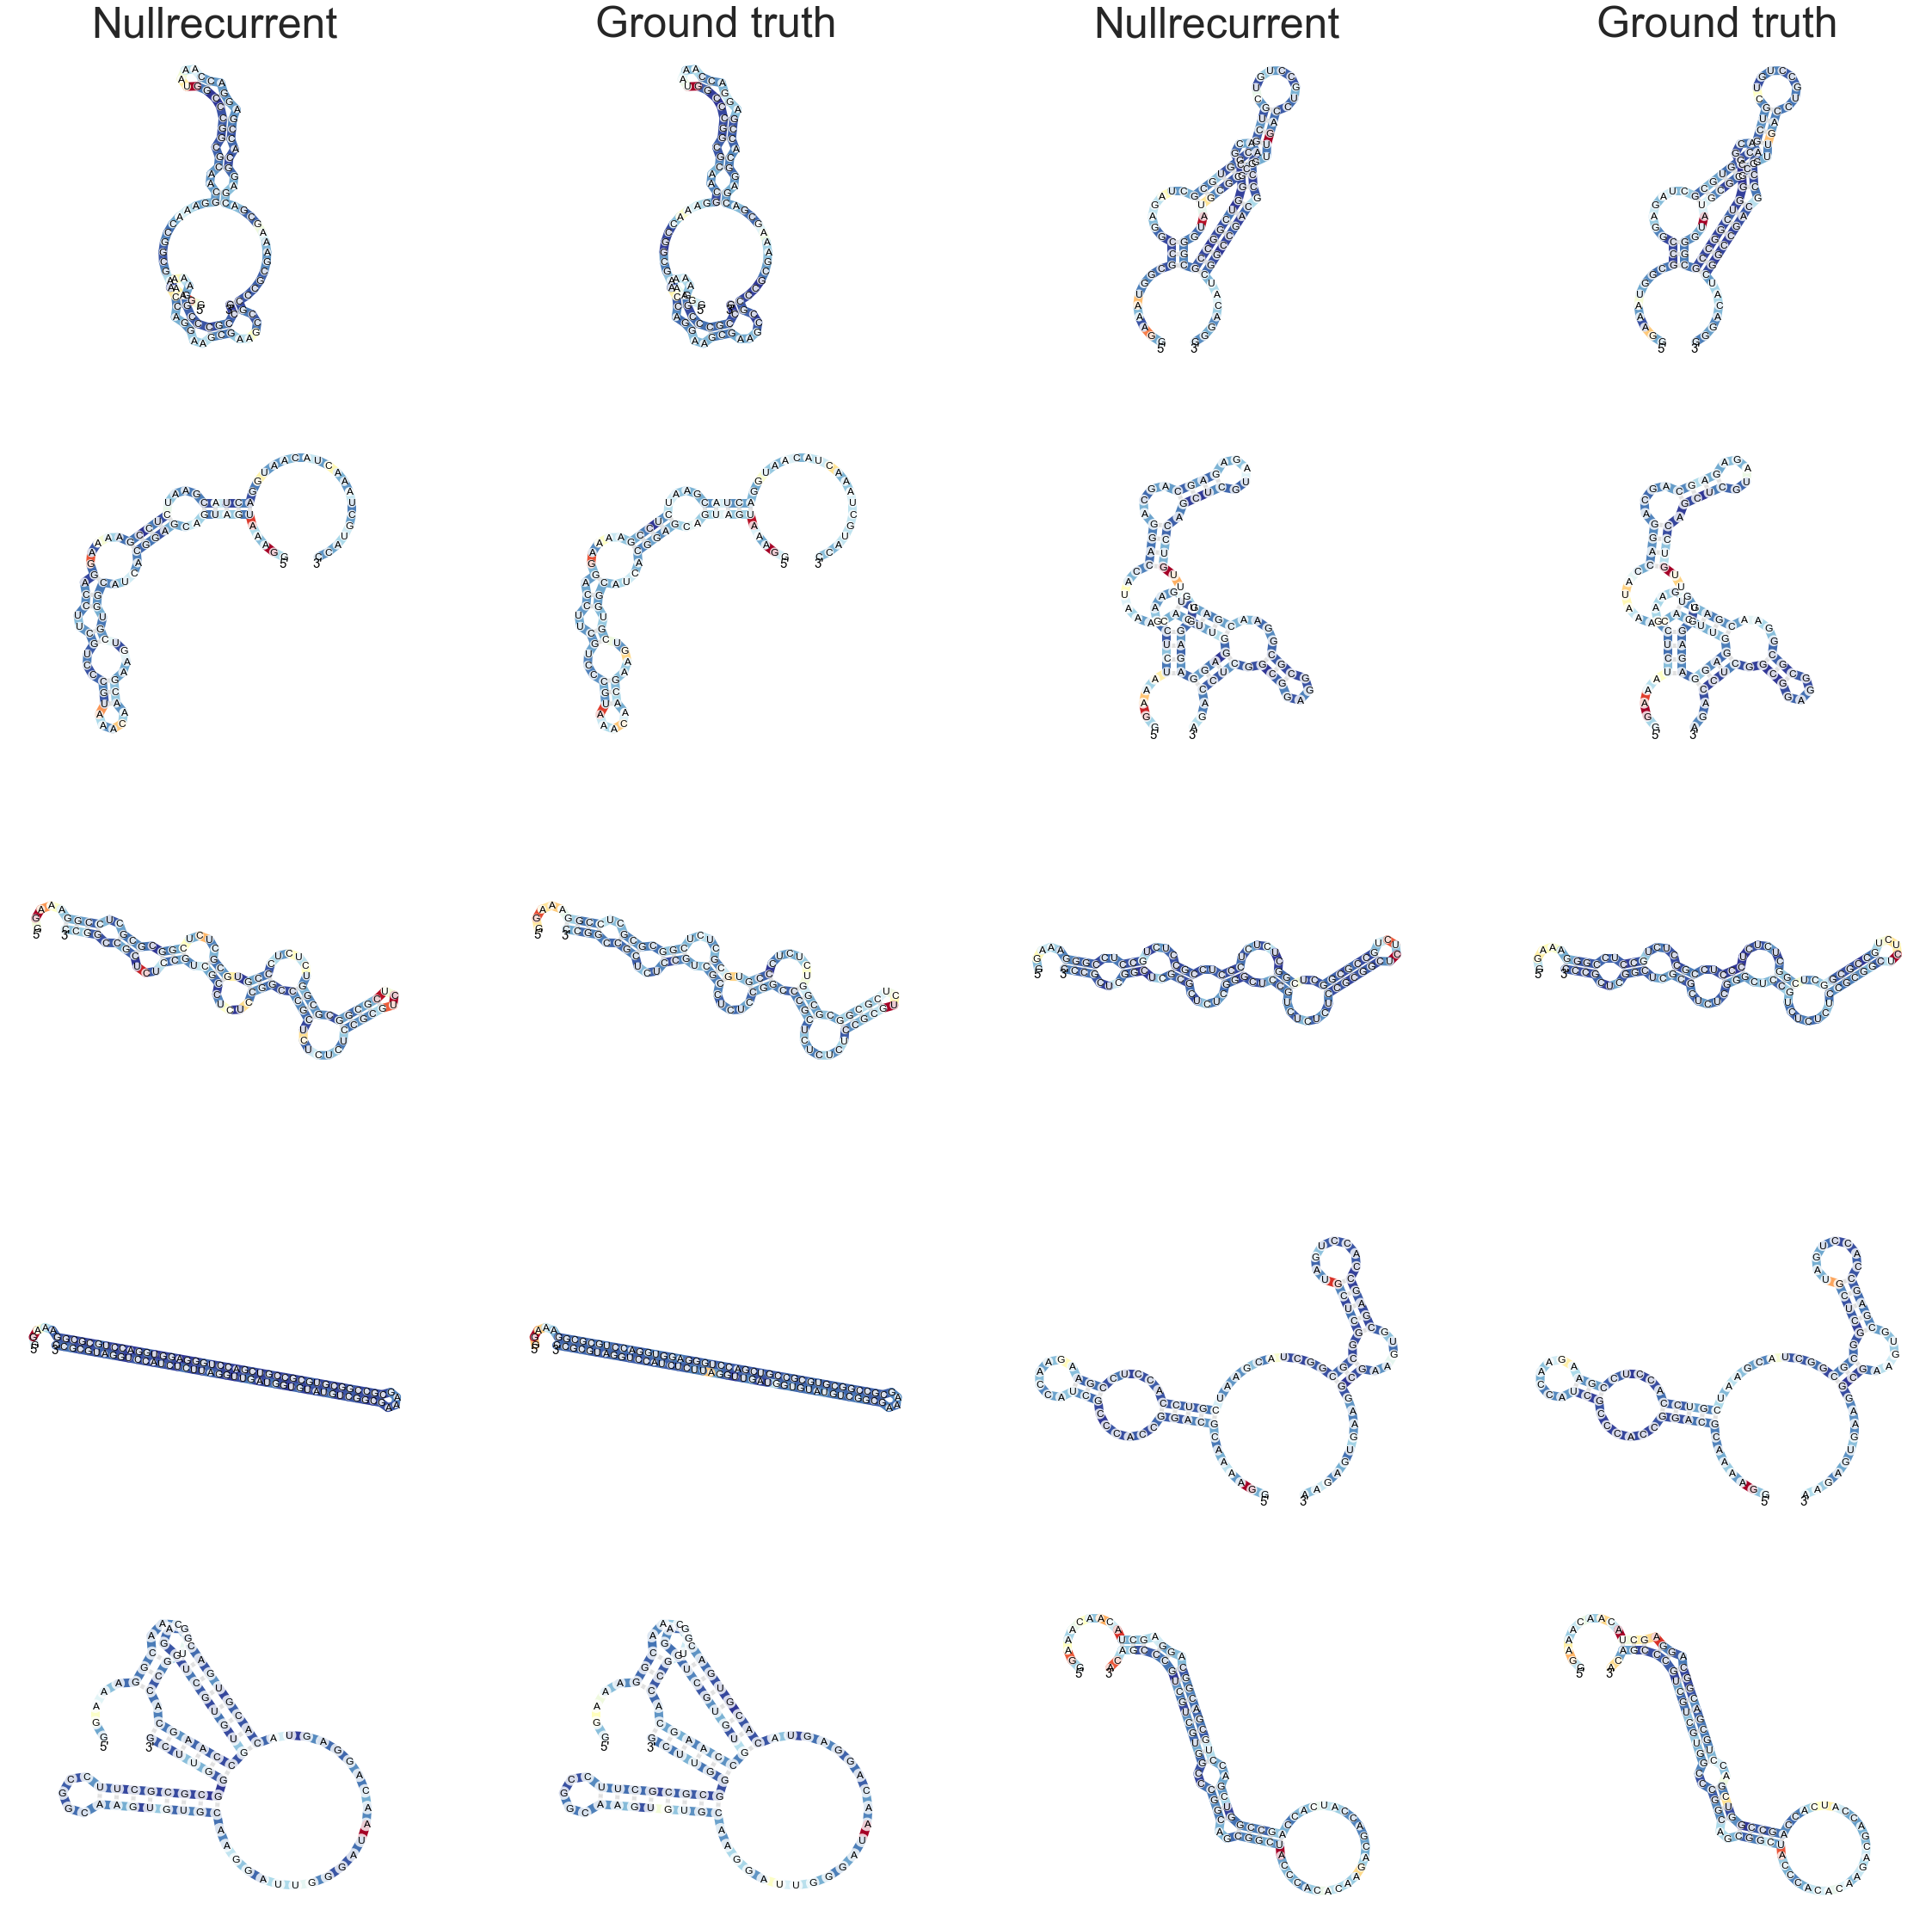

In [495]:
pull_examples(nr_df, df, 'Nullrecurrent', datatype='deg_Mg_pH10', kind='best')
savefig('Nullrecurrent_deg_Mg_pH10_best.pdf',bbox_inches='tight')

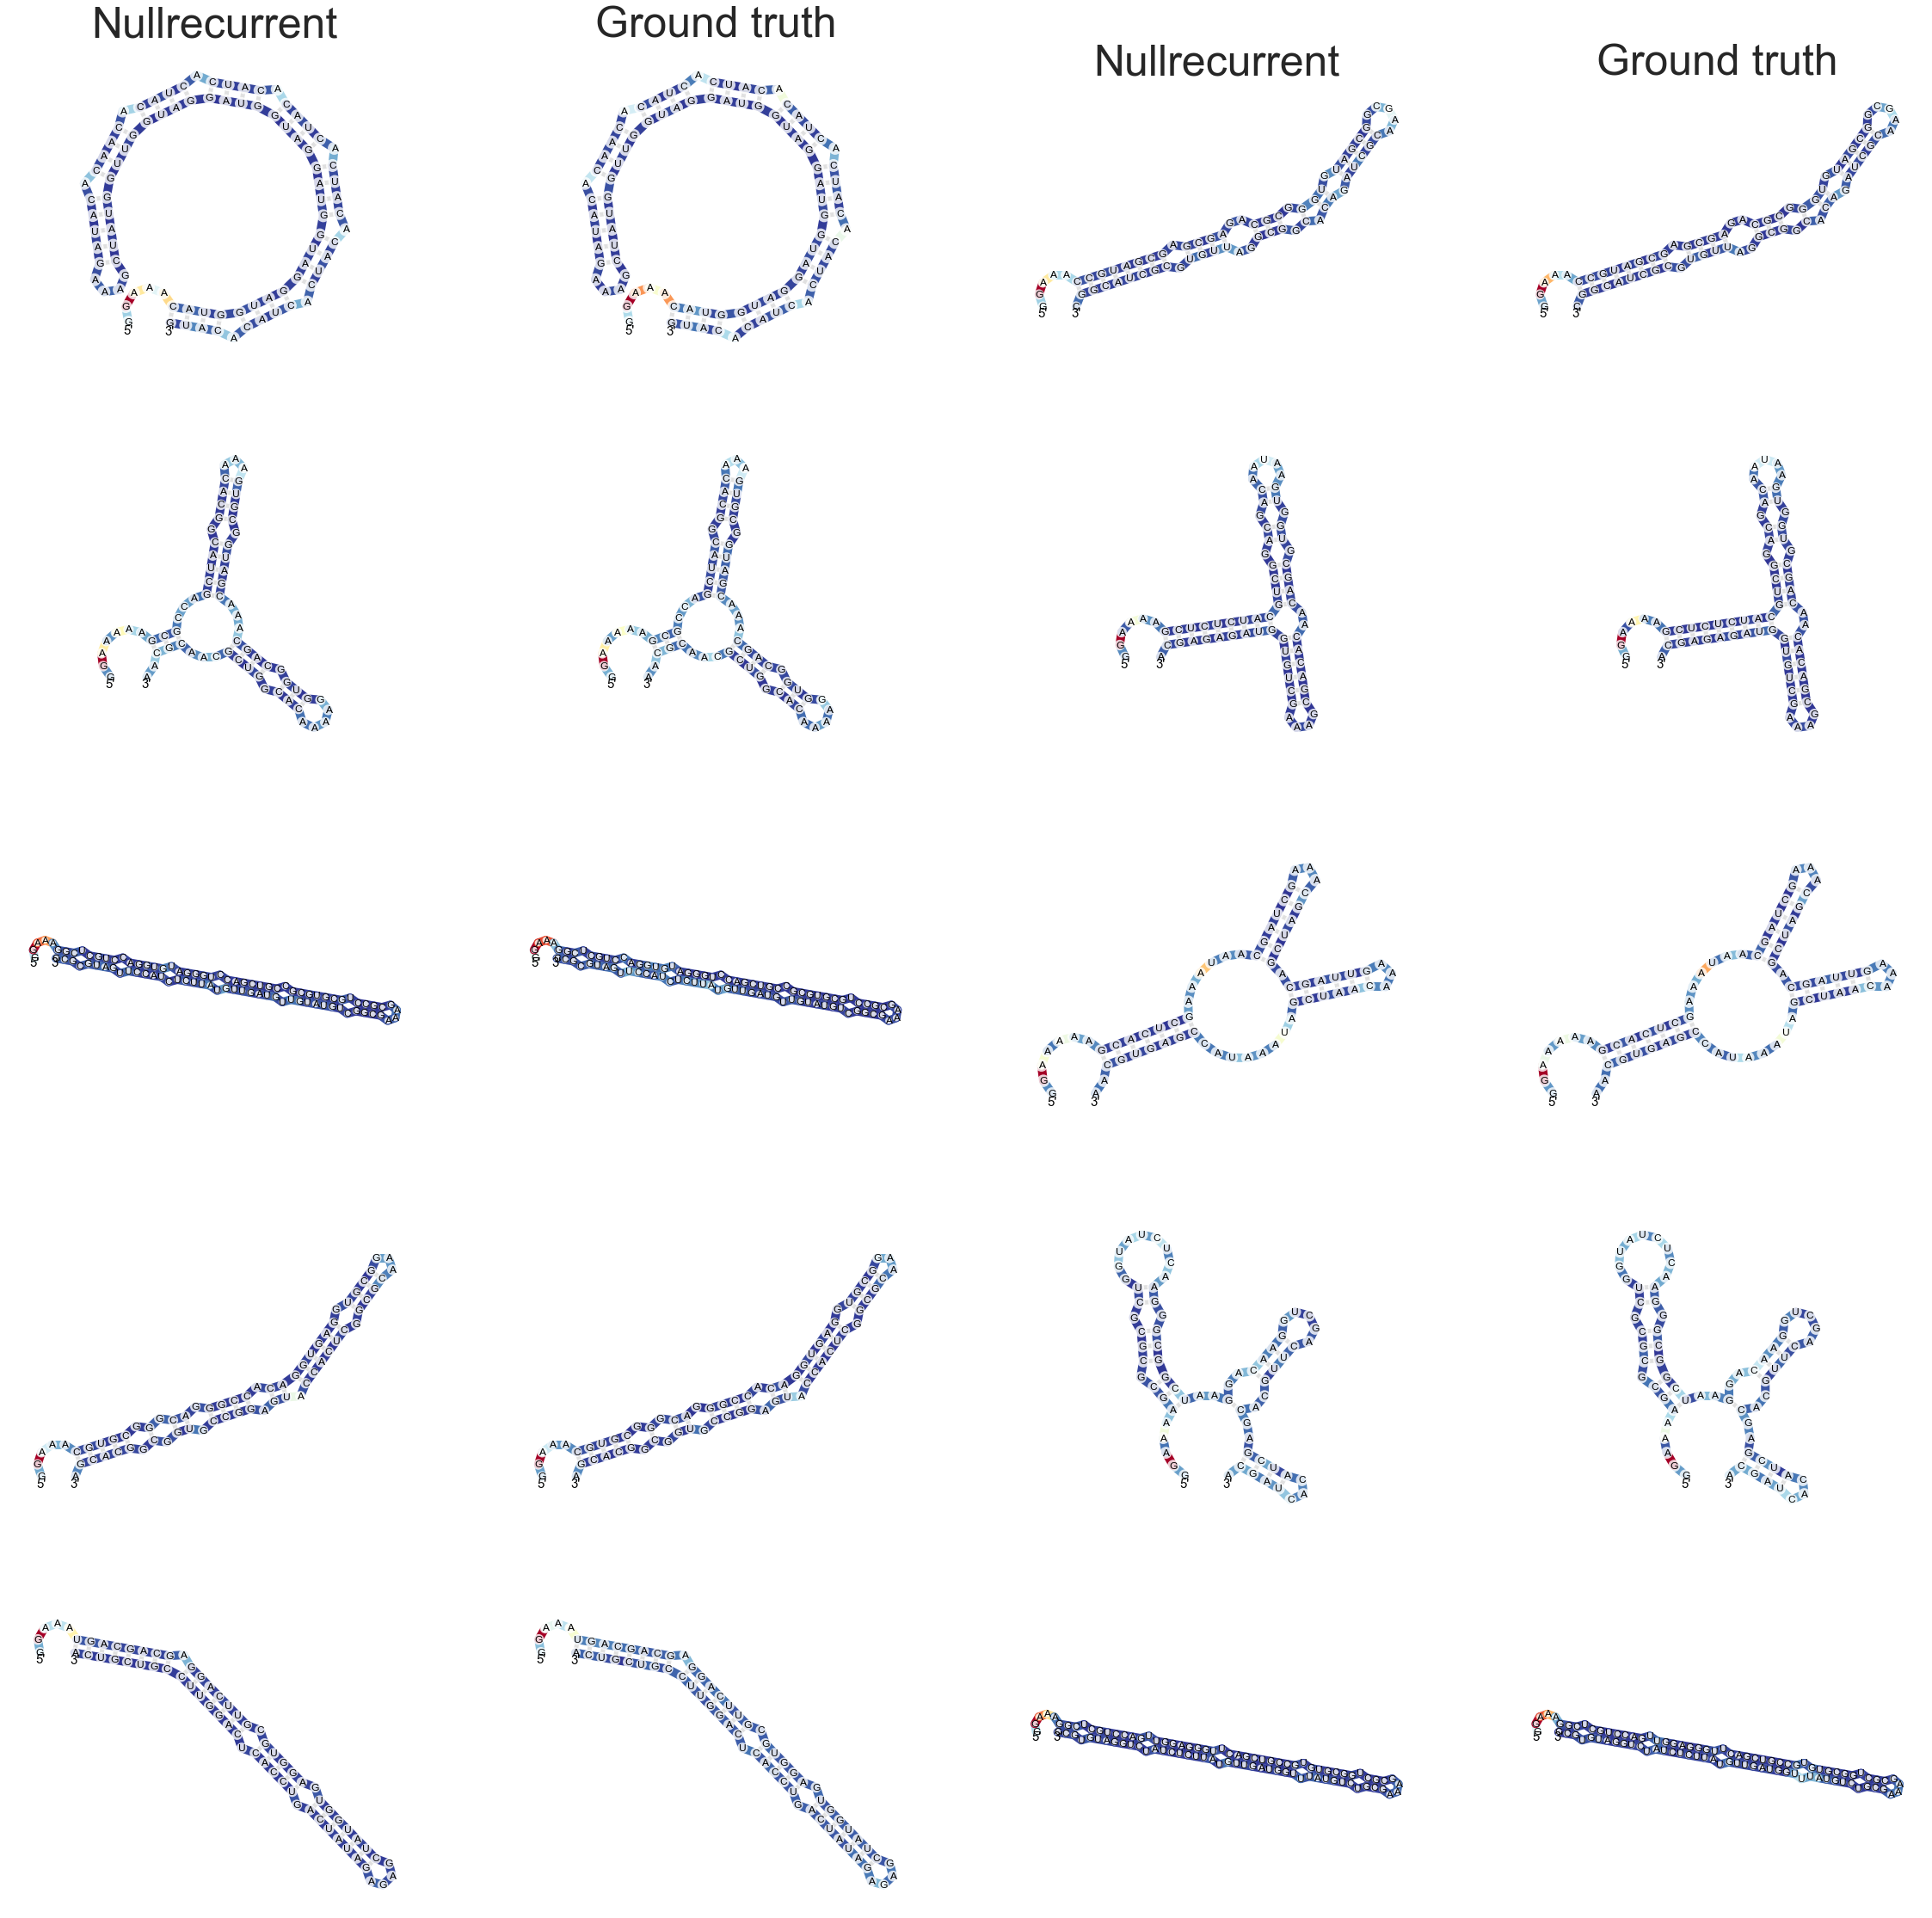

In [152]:
pull_examples(nr_df, df, 'Nullrecurrent', datatype='deg_Mg_50C', kind='best')

ERROR: pairing incorrect ..............((((((((........))))))))((((.((((..((.........))..))))..))))............(((..
ERROR: pairing incorrect ..............((((((((........))))))))((((.((((..((.........))..))))..))))............(((..
ERROR: pairing incorrect ..............((((((((........))))))))((((.((((..((.........))..))))..))))............(((..
ERROR: pairing incorrect ..............((((((((........))))))))((((.((((..((.........))..))))..))))............(((..
ERROR: pairing incorrect ..............((((((((........))))))))((((.((((..((.........))..))))..))))............(((..
ERROR: pairing incorrect ..............((((((((........))))))))((((.((((..((.........))..))))..))))............(((..
ERROR: pairing incorrect ..............((((((((........))))))))((((.((((..((.........))..))))..))))............(((..
ERROR: pairing incorrect ..............((((((((........))))))))((((.((((..((.........))..))))..))))............(((..
ERROR: pairing incorrect ..............((((((((........))))))))(

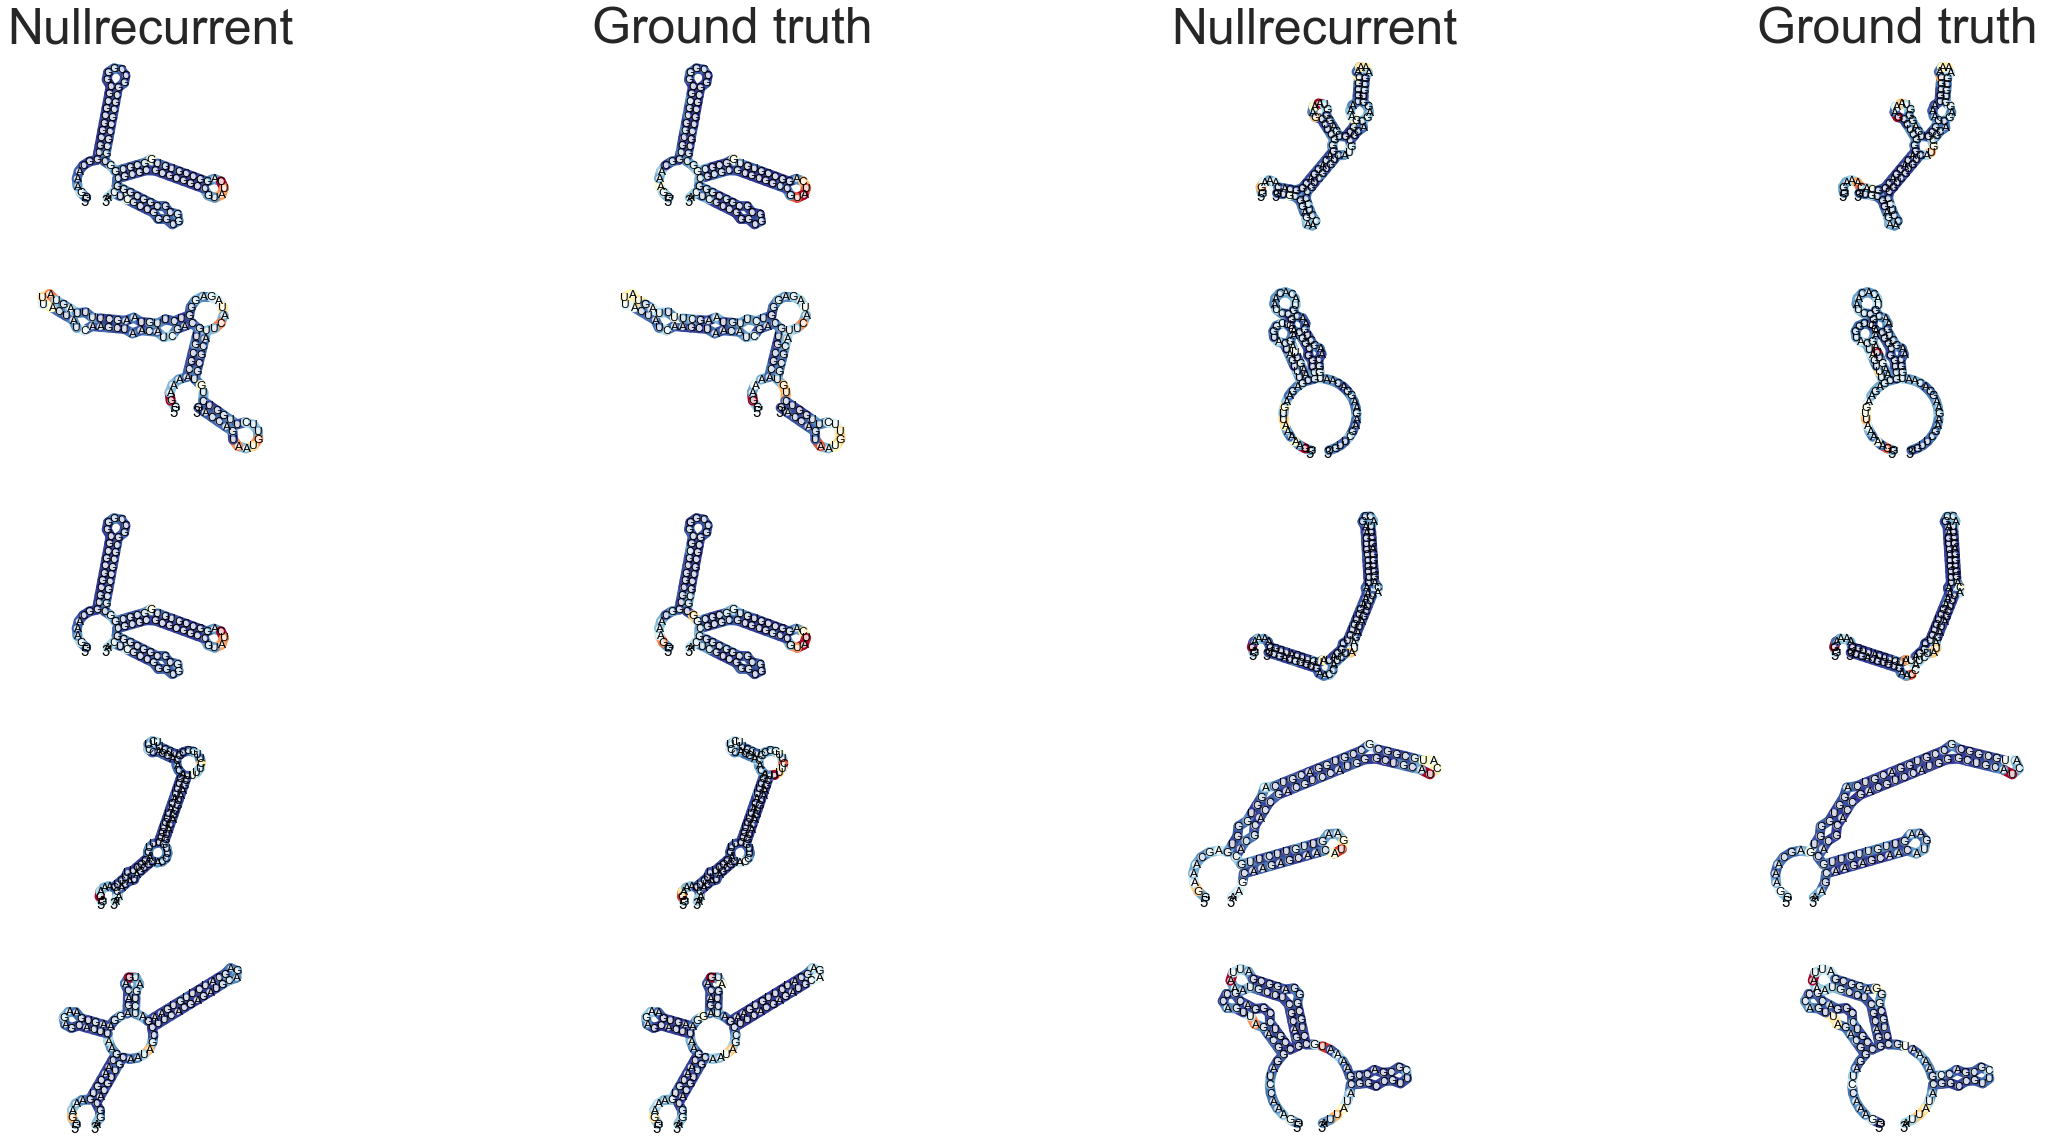

In [37]:
pull_examples(nr_df, df, 'Nullrecurrent', datatype='deg_Mg_pH10', kind='middle')

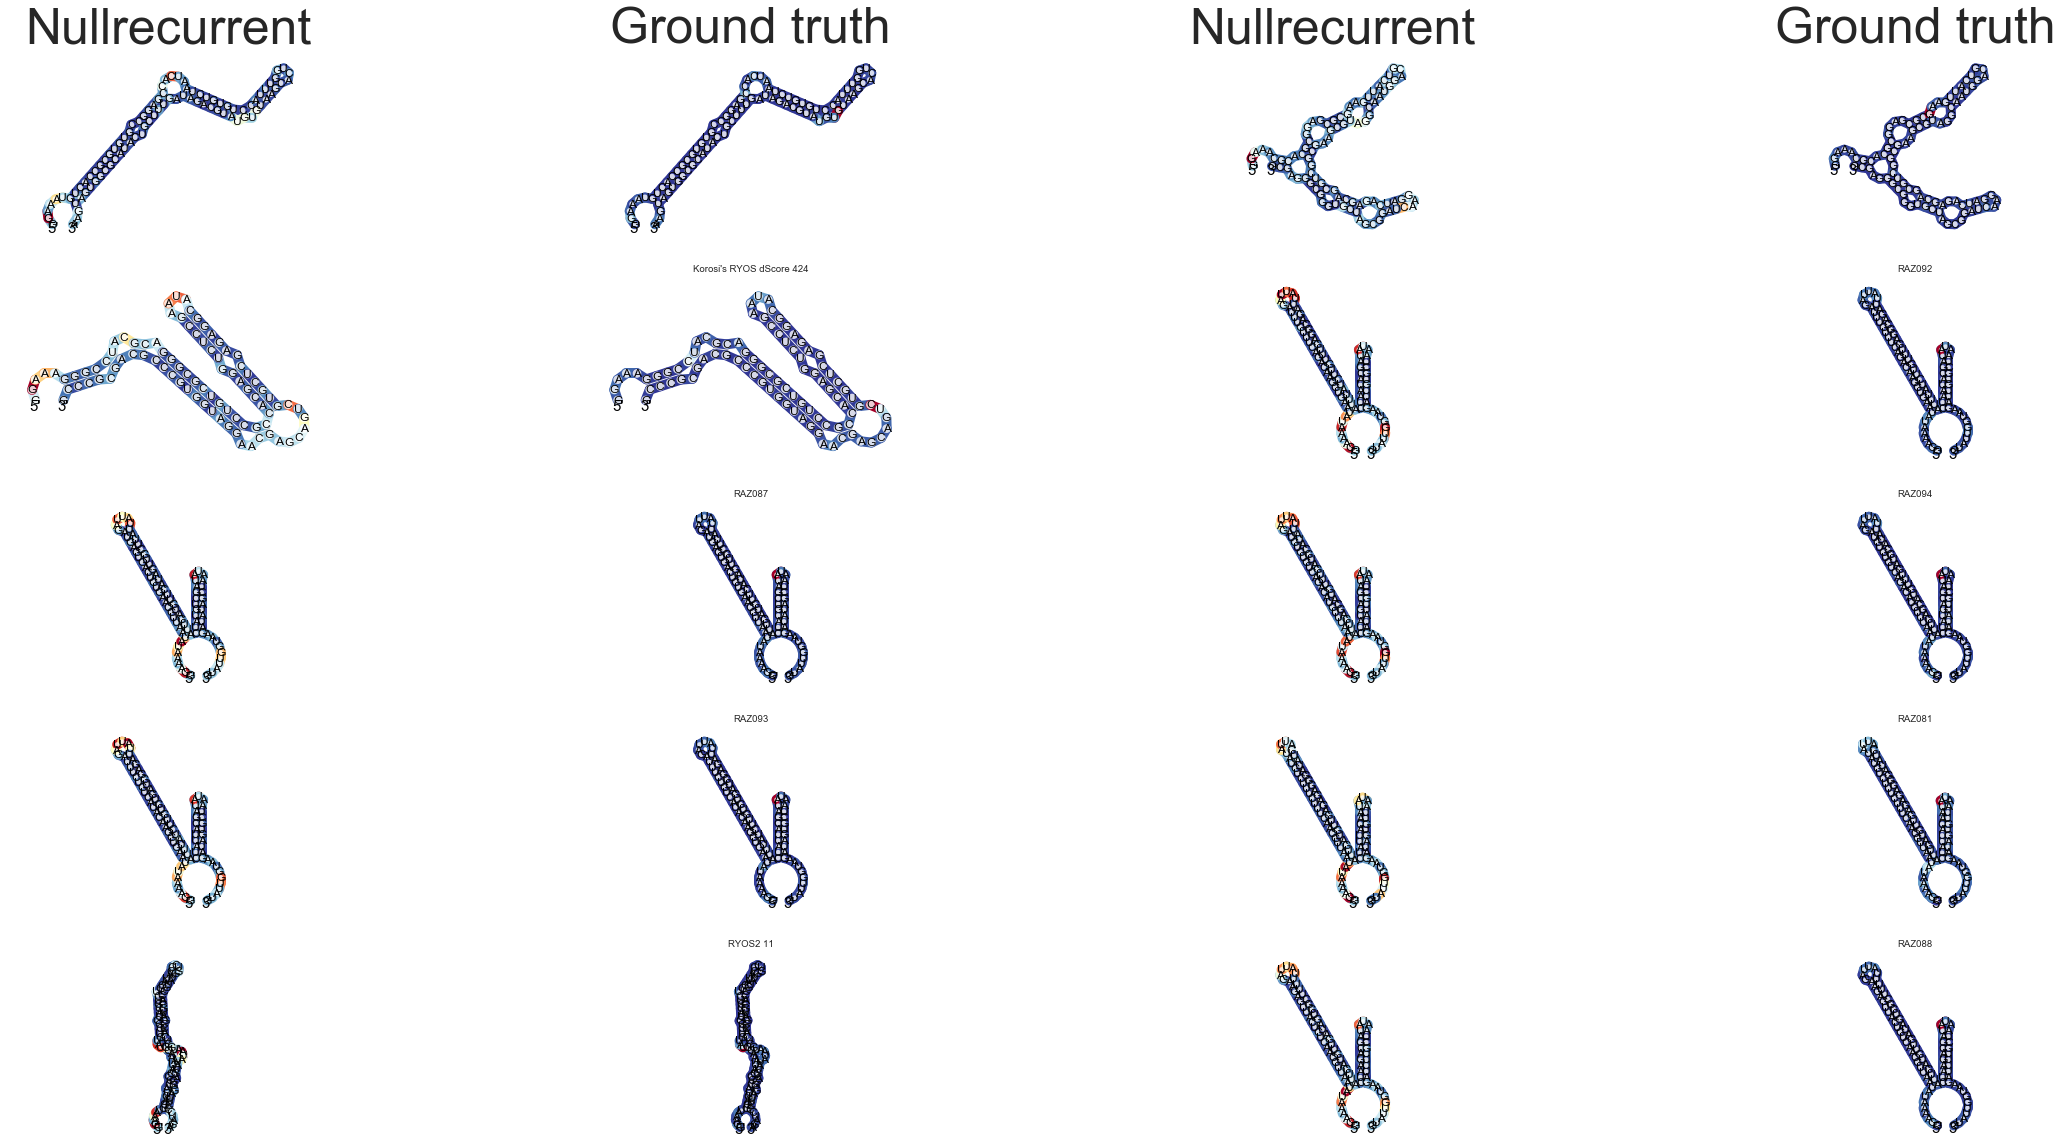

In [126]:
pull_examples(nr_df, df, 'Nullrecurrent', datatype='deg_Mg_pH10', kind='worst')